<a href="https://colab.research.google.com/github/aishwaryakg2415/agri/blob/main/agri.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing  import LabelEncoder,StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [ ]:
data = pd.read_csv("/content/agriculture_dataset.csv")

In [ ]:
data.shape

(300, 10)

In [ ]:
data.isnull().sum()

,0
Farm_ID,0
Crop_Type,0
Farm_Area(acres),0
Irrigation_Type,0
Fertilizer_Used(tons),0
Pesticide_Used(kg),0
Yield(tons),0
Soil_Type,0
Season,0
Water_Usage(cubic meters),0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Farm_ID                    300 non-null    object 
 1   Crop_Type                  300 non-null    object 
 2   Farm_Area(acres)           300 non-null    float64
 3   Irrigation_Type            300 non-null    object 
 4   Fertilizer_Used(tons)      300 non-null    float64
 5   Pesticide_Used(kg)         300 non-null    float64
 6   Yield(tons)                300 non-null    float64
 7   Soil_Type                  300 non-null    object 
 8   Season                     300 non-null    object 
 9   Water_Usage(cubic meters)  300 non-null    float64
dtypes: float64(5), object(5)
memory usage: 23.6+ KB


In [ ]:
data.describe()

,Farm_Area(acres),Fertilizer_Used(tons),Pesticide_Used(kg),Yield(tons),Water_Usage(cubic meters)
count,300.000000,300.000000,300.000000,300.000000,300.000000
mean,254.963800,4.905400,2.398000,27.059200,56724.295600
std,138.247167,2.709744,1.426534,13.233732,27036.062795
min,12.500000,0.500000,0.140000,3.860000,5869.750000
25%,135.560000,2.300000,0.960000,16.030000,37466.110000
50%,281.980000,5.045000,2.330000,28.970000,54097.075000
75%,370.790000,6.950000,3.450000,38.180000,82549.030000
max,483.880000,9.960000,4.990000,48.020000,94754.730000


In [ ]:
data['Crop_Type'].value_counts()

,count
Crop_Type,
Cotton,42
Barley,42
Tomato,36
Rice,30
Soybean,30
Sugarcane,30
Carrot,24
Wheat,24
Potato,24


In [ ]:
data['Irrigation_Type'].value_counts()

,count
Irrigation_Type,
Drip,90
Flood,78
Sprinkler,54
Rain-fed,42
Manual,36


In [ ]:
data['Soil_Type'].value_counts()

,count
Soil_Type,
Clay,84
Loamy,66
Sandy,66
Silty,60
Peaty,24


In [ ]:
data['Season'].value_counts()

,count
Season,
Zaid,138
Kharif,96
Rabi,66


In [ ]:
data = data.drop(columns=['Farm_ID'])

In [ ]:
num_cols = data.select_dtypes(include=['int64', 'float64']).columns.tolist()
cat_cols = data.select_dtypes(exclude=['int64', 'float64']).columns.tolist()
print(num_cols)
print(cat_cols)

['Farm_Area(acres)', 'Fertilizer_Used(tons)', 'Pesticide_Used(kg)', 'Yield(tons)', 'Water_Usage(cubic meters)']
['Crop_Type', 'Irrigation_Type', 'Soil_Type', 'Season']


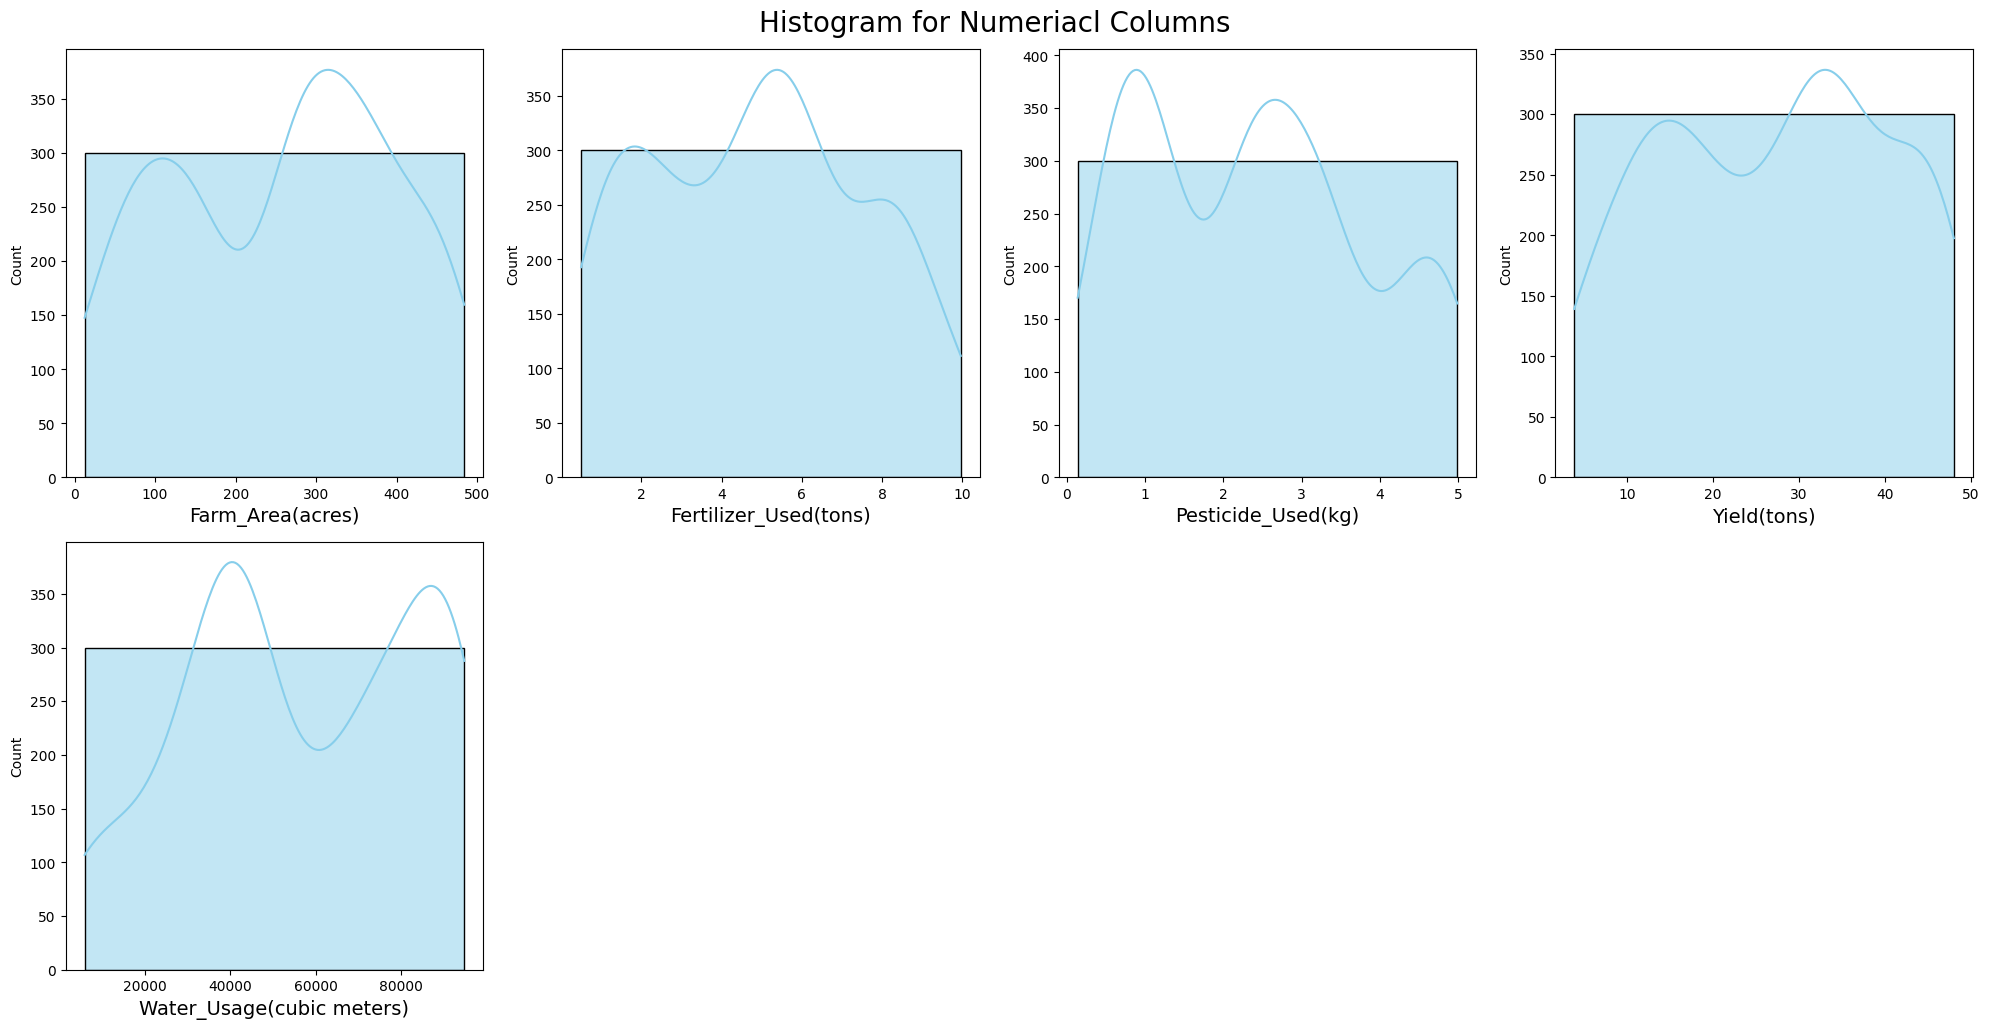

In [ ]:
plt.figure(figsize=(20,20))
pt = 1
for column in num_cols:
    ax = plt.subplot(4, 4, pt)
    sns.histplot(data[column], ax=ax, bins=True, kde=True, color='skyblue')
    ax.set_xlabel(column, fontsize=14)
    pt+=1

plt.suptitle("Histogram for Numeriacl Columns", fontsize=20, ha = 'center')
plt.tight_layout(rect=[0,0,1,0.99])
plt.show()

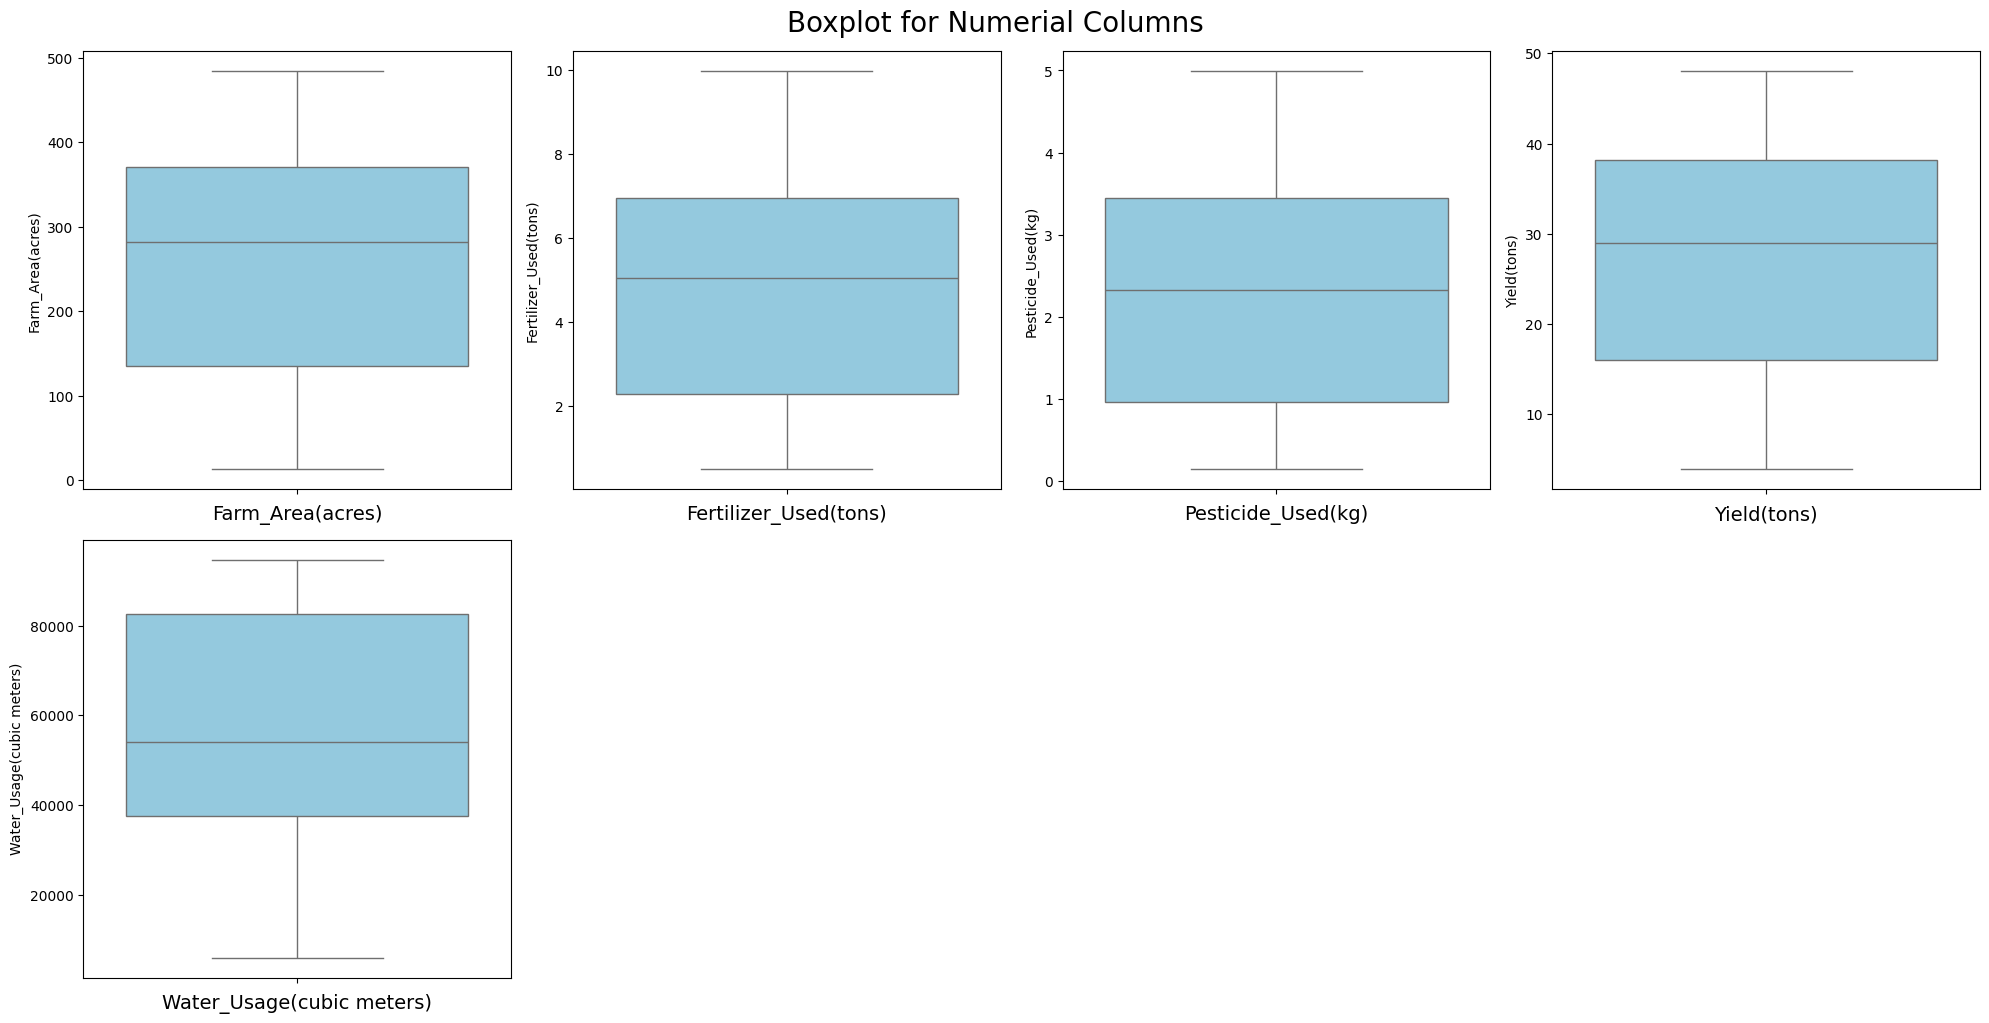

In [ ]:
plt.figure(figsize=(20,20))
pt=1
for column in num_cols:
    ax = plt.subplot(4,4,pt)
    sns.boxplot(data[column], ax=ax, color='skyblue')
    ax.set_xlabel(column, fontsize=14)
    pt+=1

plt.suptitle("Boxplot for Numerial Columns", fontsize=20, ha='center')
plt.tight_layout(rect=[0,0,1,0.99])
plt.show()

In [ ]:
for column in num_cols:
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]

    print('Outlier in: ', column)
    print(outliers[[column]])
    print('Number of outliers: ',len(outliers), '\n')

Outlier in:  Farm_Area(acres)
Empty DataFrame
Columns: [Farm_Area(acres)]
Index: []
Number of outliers:  0 

Outlier in:  Fertilizer_Used(tons)
Empty DataFrame
Columns: [Fertilizer_Used(tons)]
Index: []
Number of outliers:  0 

Outlier in:  Pesticide_Used(kg)
Empty DataFrame
Columns: [Pesticide_Used(kg)]
Index: []
Number of outliers:  0 

Outlier in:  Yield(tons)
Empty DataFrame
Columns: [Yield(tons)]
Index: []
Number of outliers:  0 

Outlier in:  Water_Usage(cubic meters)
Empty DataFrame
Columns: [Water_Usage(cubic meters)]
Index: []
Number of outliers:  0 



In [ ]:
crop_encoder = LabelEncoder()
irrigation_encoder = LabelEncoder()
soil_encoder = LabelEncoder()
season_encoder = LabelEncoder()

data['Crop_Type'] = crop_encoder.fit_transform(data['Crop_Type'])
data['Irrigation_Type'] = irrigation_encoder.fit_transform(data['Irrigation_Type'])
data['Soil_Type'] = soil_encoder.fit_transform(data['Soil_Type'])
data['Season'] = season_encoder.fit_transform(data['Season'])

In [ ]:
len(data.columns)

9

In [ ]:
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data[num_cols])
data_scaled_standard = pd.DataFrame(data_scaled, columns=num_cols)

In [ ]:
data_scaled_standard.shape

(300, 5)

In [ ]:
data_scaled_standard.head()

,Farm_Area(acres),Fertilizer_Used(tons),Pesticide_Used(kg),Yield(tons),Water_Usage(cubic meters)
0,0.539328,1.195687,-0.132008,-0.955156,0.738169
1,-1.712068,-0.050051,1.377660,1.199759,0.444639
2,0.370001,-0.737610,-1.290590,0.482967,0.697058
3,0.907472,-0.586051,1.370638,0.531409,-0.419513
4,-0.865141,1.265921,1.461920,1.227764,1.370621


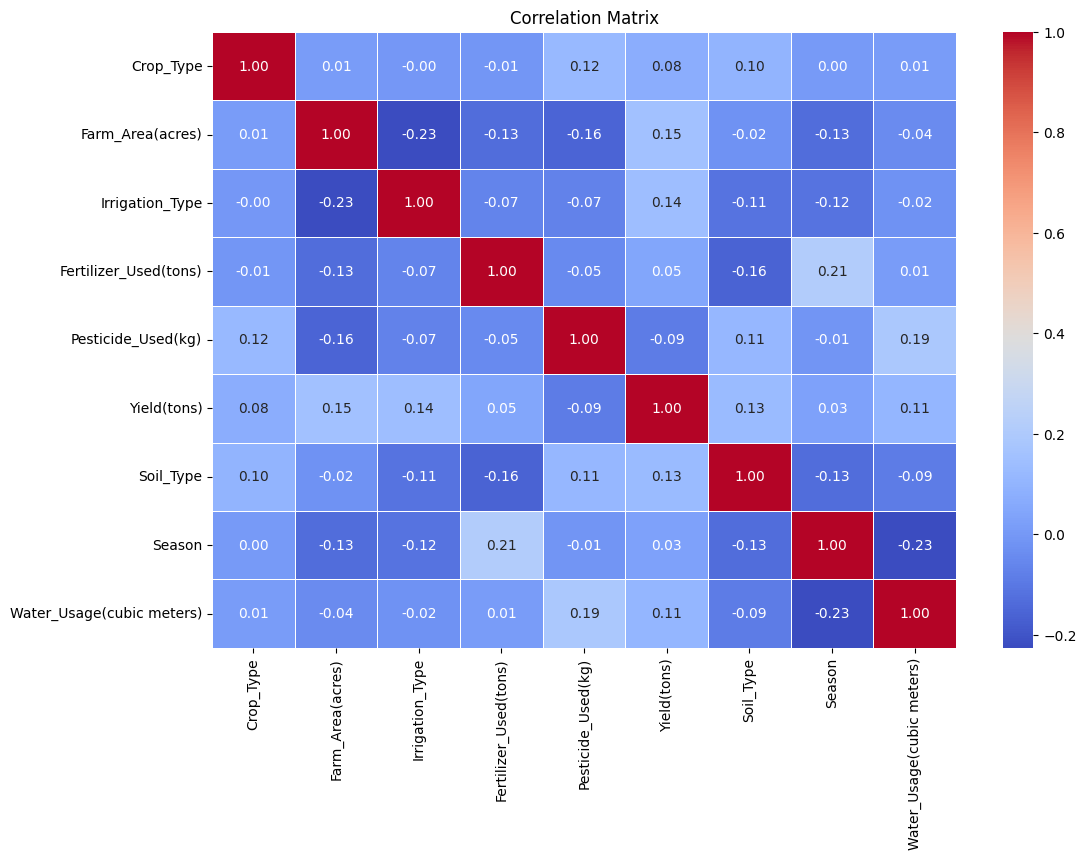

In [ ]:
corr_matrix = data.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

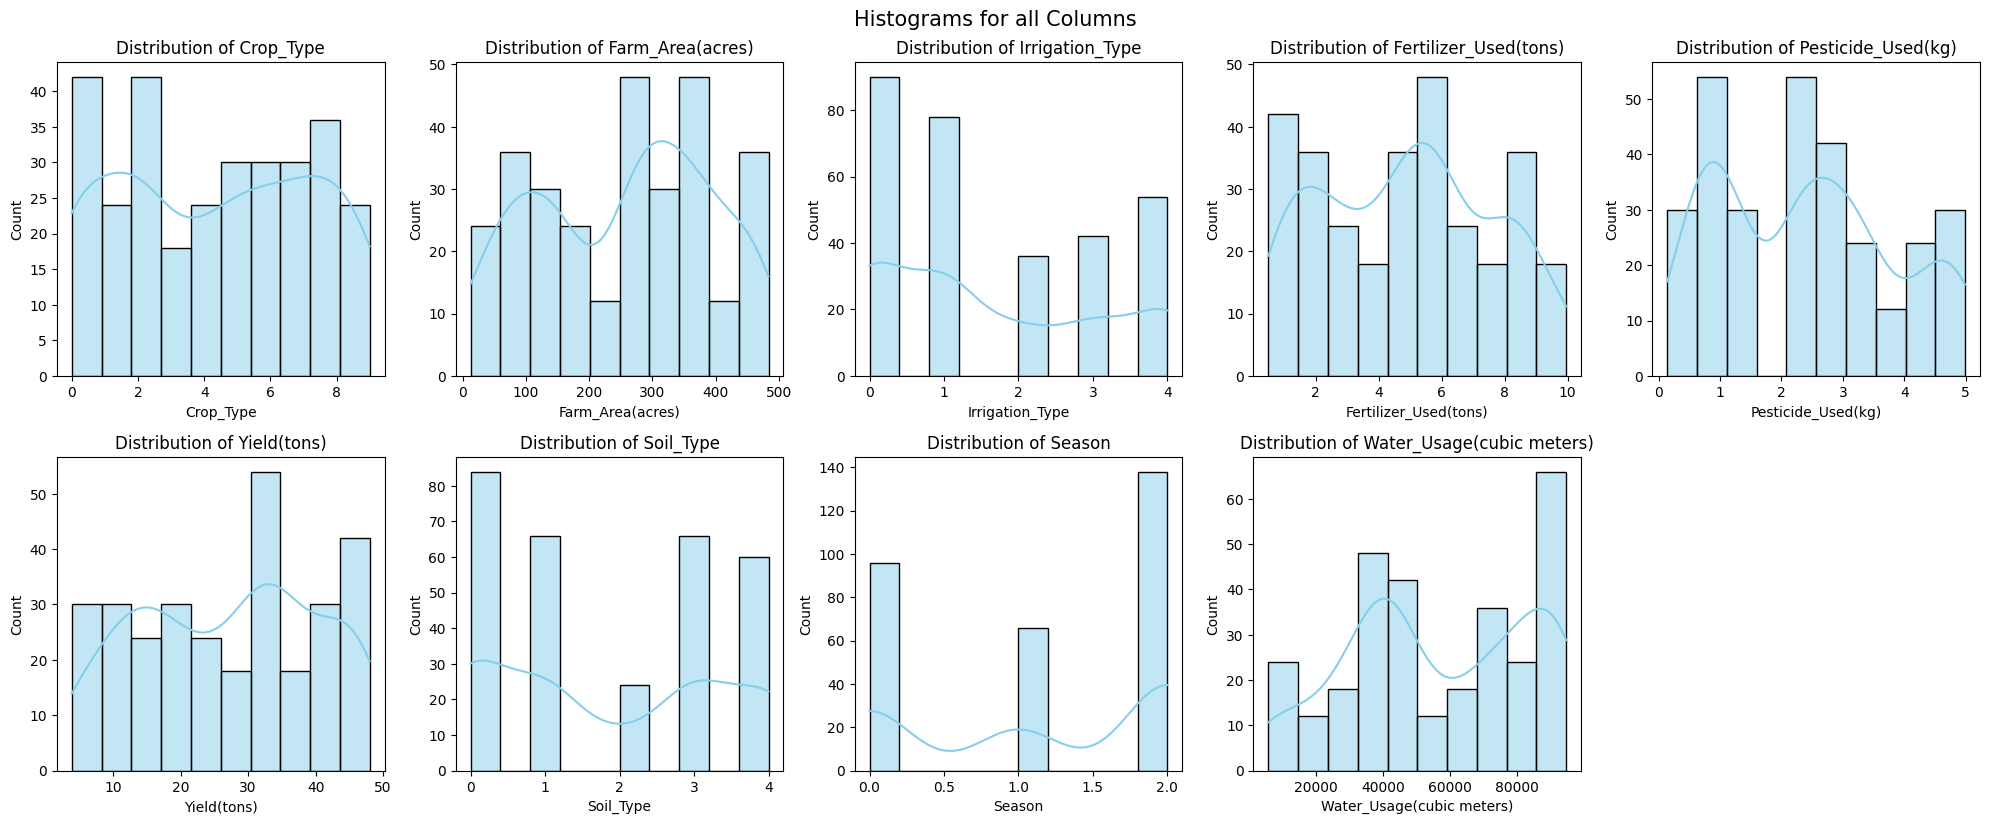

In [ ]:
plt.figure(figsize=(20,20))
for i, column in enumerate(data.columns):
    plt.subplot(5, 5, i+1)  # Adjust the number of rows and columns based on the number of features
    sns.histplot(data[column], kde=True, color='skyblue')
    plt.title(f'Distribution of {column}')
plt.suptitle('Histograms for all Columns', fontsize=15, ha='center')
plt.tight_layout(rect=[0, 0, 1, 0.99])
plt.show()

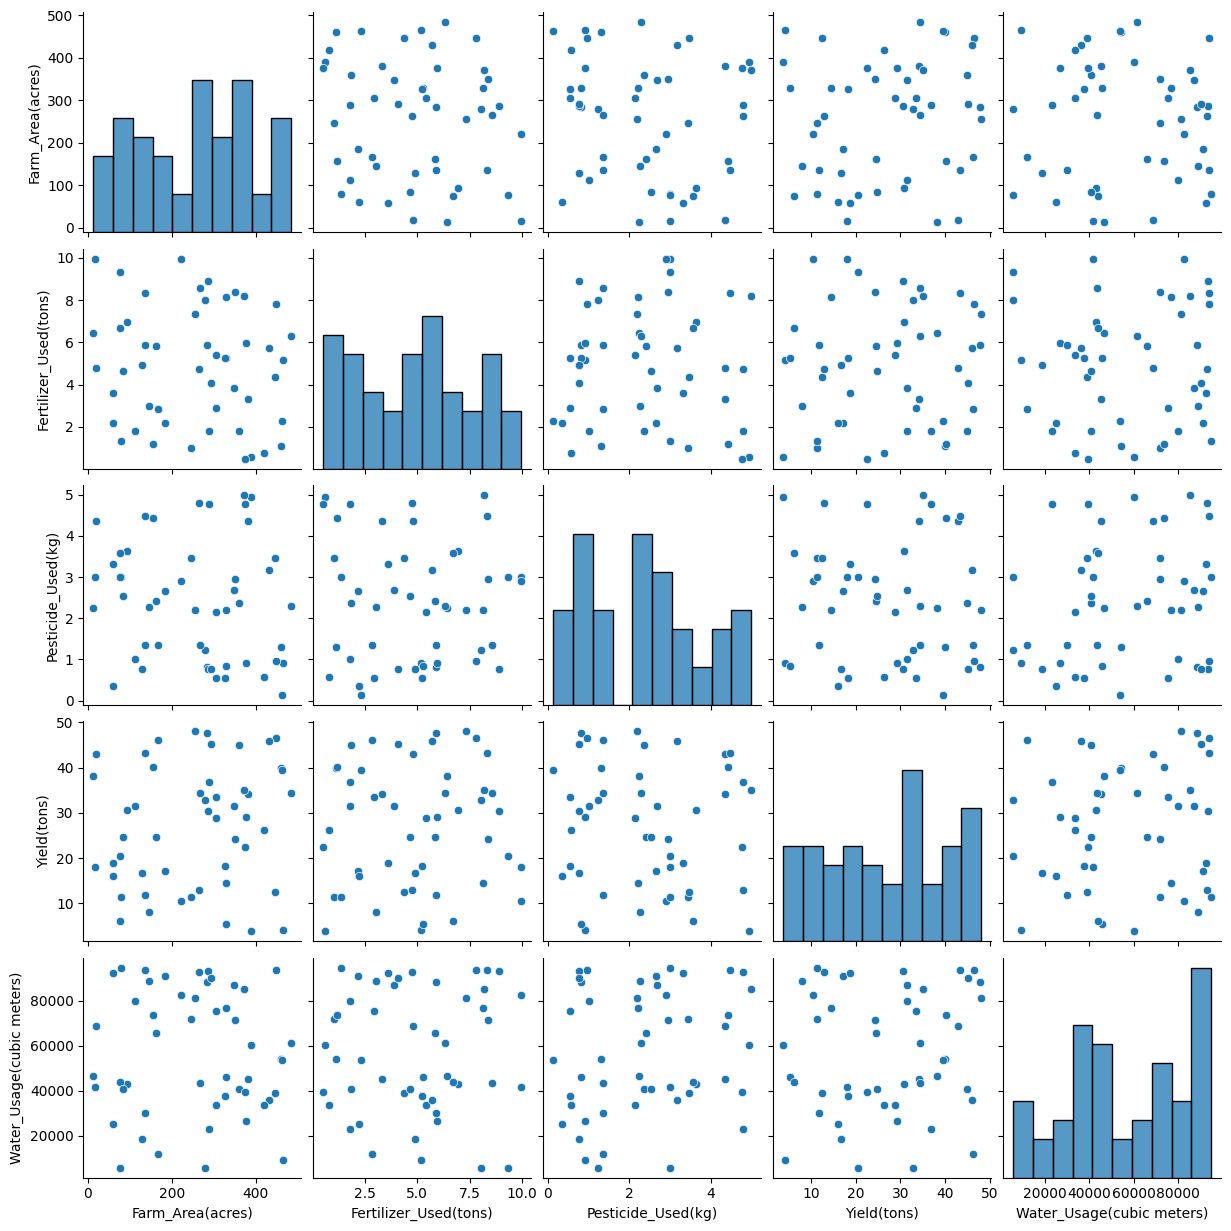

In [ ]:
sns.pairplot(data[num_cols ])

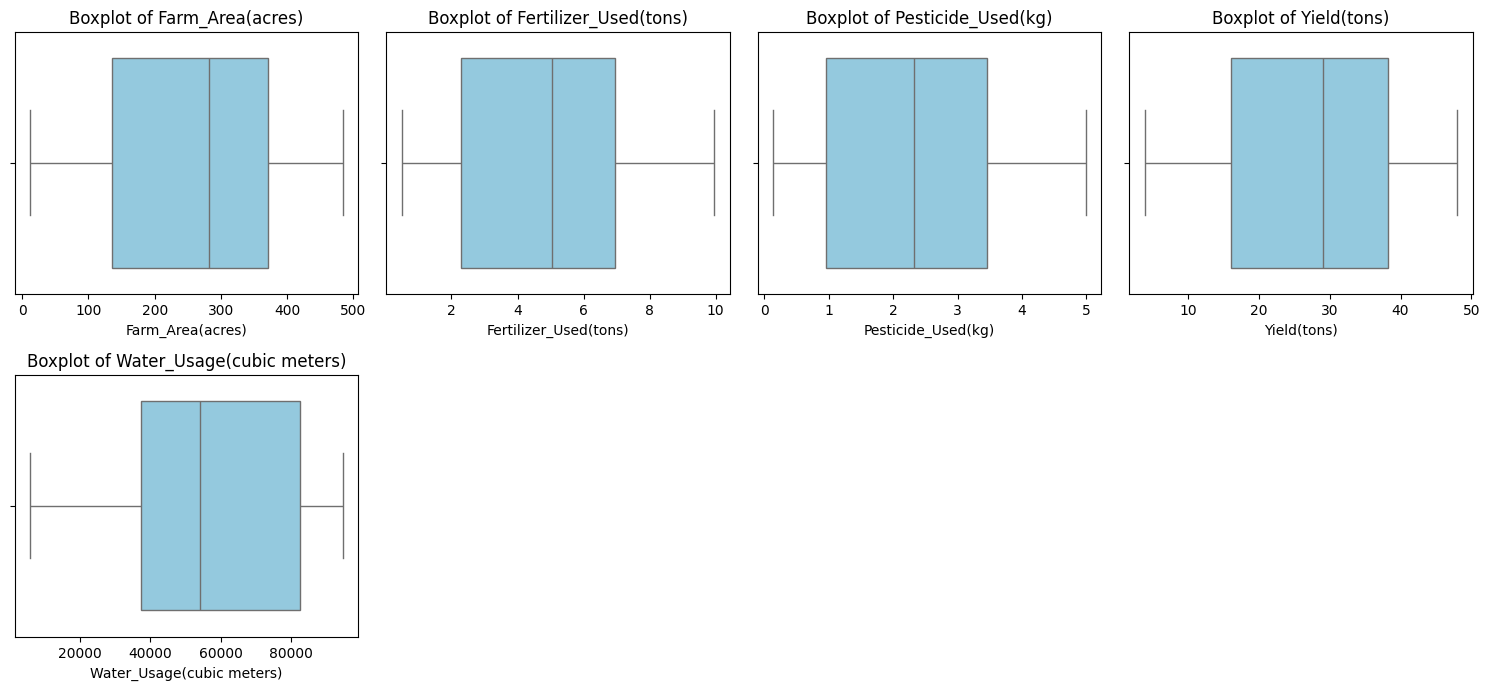

In [ ]:
plt.figure(figsize=(15, 10))

for i, column in enumerate(num_cols):
    plt.subplot(3, 4, i+1)  # Adjust the number of rows and columns
    sns.boxplot(x=data[column], color='skyblue')
    plt.title(f'Boxplot of {column}')
    plt.tight_layout()

plt.show()

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, root_mean_squared_error

In [ ]:
X = data.drop(columns=['Yield(tons)'])
y = data['Yield(tons)']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
X.shape

(300, 8)

In [ ]:
X_train.columns

Index(['Crop_Type', 'Farm_Area(acres)', 'Irrigation_Type',
       'Fertilizer_Used(tons)', 'Pesticide_Used(kg)', 'Soil_Type', 'Season',
       'Water_Usage(cubic meters)'],
      dtype='object')

In [ ]:
ln_clf = LinearRegression()
rf_clf = RandomForestRegressor(random_state=42)
gb_clf = GradientBoostingRegressor(random_state=42)

In [ ]:
def evaluate_model(model, X_train, X_test, y_train, y_test):

    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    r2 = r2_score(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = root_mean_squared_error(y_test, y_pred)  # Correct RMSE
    mae = mean_absolute_error(y_test, y_pred)

    return r2, mse, rmse, mae

In [ ]:
ln_results = evaluate_model(ln_clf, X_train, X_test, y_train, y_test)
rf_results = evaluate_model(rf_clf, X_train, X_test, y_train, y_test)
gb_results = evaluate_model(gb_clf, X_train, X_test, y_train, y_test)

print("Linear Regression - R2: {:.2f}, MSE: {:.2f}, RMSE: {:.2f}, MAE: {:.2f}".format(*ln_results))
print("Random Forest - R2: {:.2f}, MSE: {:.2f}, RMSE: {:.2f}, MAE: {:.2f}".format(*rf_results))
print("Gradient Boosting - R2: {:.2f}, MSE: {:.2f}, RMSE: {:.2f}, MAE: {:.2f}".format(*gb_results))

Linear Regression - R2: 0.12, MSE: 144.83, RMSE: 12.03, MAE: 10.05
Random Forest - R2: 1.00, MSE: 0.28, RMSE: 0.53, MAE: 0.28
Gradient Boosting - R2: 1.00, MSE: 0.62, RMSE: 0.79, MAE: 0.64


In [ ]:
rf_param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10]
}
rf_grid_search = GridSearchCV(estimator=rf_clf, param_grid=rf_param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
rf_grid_search.fit(X_train, y_train)
print("Best Random Forest Hyperparameters:", rf_grid_search.best_params_)

gb_param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 5, 7]
}
gb_grid_search = GridSearchCV(estimator=gb_clf, param_grid=gb_param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
gb_grid_search.fit(X_train, y_train)
print("Best Gradient Boosting Hyperparameters:", gb_grid_search.best_params_)

Best Random Forest Hyperparameters: {'max_depth': 20, 'min_samples_split': 2, 'n_estimators': 50}
Best Gradient Boosting Hyperparameters: {'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 200}


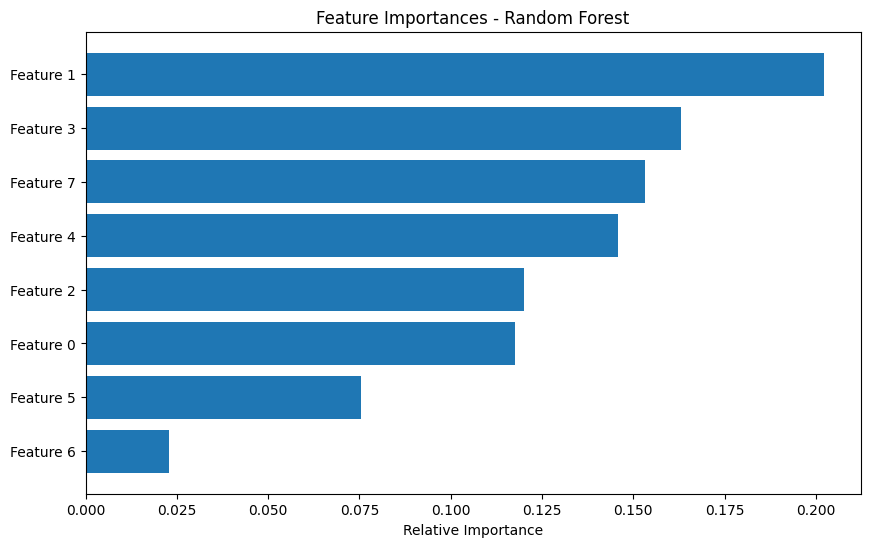

In [ ]:
import matplotlib.pyplot as plt

rf_model = rf_grid_search.best_estimator_
importances = rf_model.feature_importances_
indices = importances.argsort()

plt.figure(figsize=(10, 6))
plt.title("Feature Importances - Random Forest")
plt.barh(range(len(indices)), importances[indices], align="center")
plt.yticks(range(len(indices)), [f"Feature {i}" for i in indices])
plt.xlabel("Relative Importance")
plt.show()

In [ ]:
rf_best_model = rf_grid_search.best_estimator_
gb_best_model = gb_grid_search.best_estimator_

rf_cv_scores = cross_val_score(rf_best_model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
print(f"Random Forest Cross-Validation MSE: {-rf_cv_scores.mean():.2f} ± {rf_cv_scores.std():.2f}")

gb_cv_scores = cross_val_score(gb_best_model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
print(f"Gradient Boosting Cross-Validation MSE: {-gb_cv_scores.mean():.2f} ± {gb_cv_scores.std():.2f}")

Random Forest Cross-Validation MSE: 3.32 ± 0.85
Gradient Boosting Cross-Validation MSE: 0.00 ± 0.00


In [ ]:
rf_best_model.fit(X_train, y_train)
gb_best_model.fit(X_train, y_train)

rf_pred = rf_best_model.predict(X_test)
gb_pred = gb_best_model.predict(X_test)

rf_r2 = r2_score(y_test, rf_pred)
rf_mse = mean_squared_error(y_test, rf_pred)
rf_rmse = root_mean_squared_error(y_test, rf_pred)
rf_mae = mean_absolute_error(y_test, rf_pred)

gb_r2 = r2_score(y_test, gb_pred)
gb_mse = mean_squared_error(y_test, gb_pred)
gb_rmse = root_mean_squared_error(y_test, gb_pred)
gb_mae = mean_absolute_error(y_test, gb_pred)

print("\nRandom Forest Model Final Evaluation:")
print(f"R² Score: {rf_r2:.2f}")
print(f"MSE: {rf_mse:.2f}")
print(f"RMSE: {rf_rmse:.2f}")
print(f"MAE: {rf_mae:.2f}")

print("\nGradient Boosting Model Final Evaluation:")
print(f"R² Score: {gb_r2:.2f}")
print(f"MSE: {gb_mse:.2f}")
print(f"RMSE: {gb_rmse:.2f}")
print(f"MAE: {gb_mae:.2f}")


Random Forest Model Final Evaluation:
R² Score: 1.00
MSE: 0.53
RMSE: 0.73
MAE: 0.28

Gradient Boosting Model Final Evaluation:
R² Score: 1.00
MSE: 0.00
RMSE: 0.00
MAE: 0.00


In [ ]:
X_train.columns

Index(['Crop_Type', 'Farm_Area(acres)', 'Irrigation_Type',
       'Fertilizer_Used(tons)', 'Pesticide_Used(kg)', 'Soil_Type', 'Season',
       'Water_Usage(cubic meters)'],
      dtype='object')

In [ ]:
print(list(X.columns))

['Crop_Type', 'Farm_Area(acres)', 'Irrigation_Type', 'Fertilizer_Used(tons)', 'Pesticide_Used(kg)', 'Soil_Type', 'Season', 'Water_Usage(cubic meters)']


In [ ]:
import numpy as np

sample_input_string = "Cotton,329.4,Sprinkler,8.14,2.21,Loamy,Kharif,76648.2"

feature_names = X_train.columns.tolist()

categorical_features_map = {
    'Crop_Type': crop_encoder,
    'Irrigation_Type': irrigation_encoder,
    'Soil_Type': soil_encoder,
    'Season': season_encoder
}

processed_input_features = []
input_parts = sample_input_string.split(',')

for i, feature_name in enumerate(feature_names):
    value = input_parts[i]
    if feature_name in categorical_features_map:
        processed_input_features.append(categorical_features_map[feature_name].transform([value])[0])
    else:
        processed_input_features.append(float(value))

user_input_df = pd.DataFrame([processed_input_features], columns=feature_names)

rf_prediction_user = rf_best_model.predict(user_input_df)
gb_prediction_user = gb_best_model.predict(user_input_df)

print(f"User Input Features (Original): {sample_input_string}")
print(f"User Input Features (Processed for Model): {user_input_df.values.tolist()[0]}")
print(f"Predicted Yield (Random Forest) for your input: {rf_prediction_user[0]:.2f} tons")
print(f"Predicted Yield (Gradient Boosting) for your input: {gb_prediction_user[0]:.2f} tons")

User Input Features (Original): Cotton,329.4,Sprinkler,8.14,2.21,Loamy,Kharif,76648.2
User Input Features (Processed for Model): [2.0, 329.4, 4.0, 8.14, 2.21, 1.0, 0.0, 76648.2]
Predicted Yield (Random Forest) for your input: 14.44 tons
Predicted Yield (Gradient Boosting) for your input: 14.44 tons


In [ ]:
from sklearn.linear_model import Ridge

# Apply one-hot encoding to the categorical columns in X_train and X_test
X_train_ohe = pd.get_dummies(X_train, columns=['Crop_Type', 'Irrigation_Type', 'Soil_Type', 'Season'], drop_first=True, dtype=int)
X_test_ohe = pd.get_dummies(X_test, columns=['Crop_Type', 'Irrigation_Type', 'Soil_Type', 'Season'], drop_first=True, dtype=int)

# Align columns - crucial for consistent feature sets between train and test
X_train_ohe, X_test_ohe = X_train_ohe.align(X_test_ohe, join='left', axis=1, fill_value=0)

# Initialize Ridge Regression model
ridge_clf = Ridge(random_state=42)

# Train and evaluate the Ridge model
ridge_results = evaluate_model(ridge_clf, X_train_ohe, X_test_ohe, y_train, y_test)

# Print the results
print("Ridge Regression - R2: {:.2f}, MSE: {:.2f}, RMSE: {:.2f}, MAE: {:.2f}".format(*ridge_results))

Ridge Regression - R2: 0.30, MSE: 115.18, RMSE: 10.73, MAE: 8.74


In [ ]:
import pandas as pd
from sklearn.linear_model import Ridge

# Apply one-hot encoding to the categorical columns in X_train and X_test
X_train_ohe = pd.get_dummies(X_train, columns=['Crop_Type', 'Irrigation_Type', 'Soil_Type', 'Season'], drop_first=True, dtype=int)
X_test_ohe = pd.get_dummies(X_test, columns=['Crop_Type', 'Irrigation_Type', 'Soil_Type', 'Season'], drop_first=True, dtype=int)

# Align columns - crucial for consistent feature sets between train and test
X_train_ohe, X_test_ohe = X_train_ohe.align(X_test_ohe, join='left', axis=1, fill_value=0)

# Initialize Ridge Regression model
ridge_clf = Ridge(random_state=42)

# Train and evaluate the Ridge model
ridge_results = evaluate_model(ridge_clf, X_train_ohe, X_test_ohe, y_train, y_test)

# Print the results
print("Ridge Regression - R2: {:.2f}, MSE: {:.2f}, RMSE: {:.2f}, MAE: {:.2f}".format(*ridge_results))

Ridge Regression - R2: 0.30, MSE: 115.18, RMSE: 10.73, MAE: 8.74


In [ ]:
X = data.drop(columns=['Yield(tons)'])
y = data['Yield(tons)']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Reload the dataset
data = pd.read_csv("/content/agriculture_dataset.csv")

# Drop Farm_ID as per previous steps
data = data.drop(columns=['Farm_ID'])

# Initialize and fit LabelEncoders for categorical columns
crop_encoder = LabelEncoder()
irrigation_encoder = LabelEncoder()
soil_encoder = LabelEncoder()
season_encoder = LabelEncoder()

data['Crop_Type'] = crop_encoder.fit_transform(data['Crop_Type'])
data['Irrigation_Type'] = irrigation_encoder.fit_transform(data['Irrigation_Type'])
data['Soil_Type'] = soil_encoder.fit_transform(data['Soil_Type'])
data['Season'] = season_encoder.fit_transform(data['Season'])

# Define X and y
X = data.drop(columns=['Yield(tons)'])
y = data['Yield(tons)']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Data loading and preprocessing (including train-test split) completed.")

Data loading and preprocessing (including train-test split) completed.


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Reload the dataset
data = pd.read_csv("/content/agriculture_dataset.csv")

# Drop Farm_ID as per previous steps
data = data.drop(columns=['Farm_ID'])

# Initialize and fit LabelEncoders for categorical columns
crop_encoder = LabelEncoder()
irrigation_encoder = LabelEncoder()
soil_encoder = LabelEncoder()
season_encoder = LabelEncoder()

data['Crop_Type'] = crop_encoder.fit_transform(data['Crop_Type'])
data['Irrigation_Type'] = irrigation_encoder.fit_transform(data['Irrigation_Type'])
data['Soil_Type'] = soil_encoder.fit_transform(data['Soil_Type'])
data['Season'] = season_encoder.fit_transform(data['Season'])

# Define X and y
X = data.drop(columns=['Yield(tons)'])
y = data['Yield(tons)']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Data loading and preprocessing (including train-test split) completed.")

Data loading and preprocessing (including train-test split) completed.


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, root_mean_squared_error

# --- Re-initialize Data Loading and Preprocessing Steps ---
# User needs to ensure 'agriculture_dataset.csv' is available in '/content/'
data = pd.read_csv("/content/agriculture_dataset.csv")

# Drop Farm_ID as per previous steps in the notebook
data = data.drop(columns=['Farm_ID'])

# Initialize and fit LabelEncoders for categorical columns (as per previous notebook steps)
crop_encoder = LabelEncoder()
irrigation_encoder = LabelEncoder()
soil_encoder = LabelEncoder()
season_encoder = LabelEncoder()

data['Crop_Type'] = crop_encoder.fit_transform(data['Crop_Type'])
data['Irrigation_Type'] = irrigation_encoder.fit_transform(data['Irrigation_Type'])
data['Soil_Type'] = soil_encoder.fit_transform(data['Soil_Type'])
data['Season'] = season_encoder.fit_transform(data['Season'])

# Define X and y
X = data.drop(columns=['Yield(tons)'])
y = data['Yield(tons)']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Re-define the evaluate_model function (as it was lost from kernel memory)
def evaluate_model(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = root_mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    return r2, mse, rmse, mae

print("Necessary setup (data loading, preprocessing, train-test split, evaluate_model function) completed.")

# --- Ridge Regression Implementation (as per the subtask) ---
# Apply one-hot encoding to the categorical columns in X_train and X_test
# Note: These columns were already LabelEncoded. pd.get_dummies will now create
# dummy variables from these integer representations, which is consistent with the instruction.
X_train_ohe = pd.get_dummies(X_train, columns=['Crop_Type', 'Irrigation_Type', 'Soil_Type', 'Season'], drop_first=True, dtype=int)
X_test_ohe = pd.get_dummies(X_test, columns=['Crop_Type', 'Irrigation_Type', 'Soil_Type', 'Season'], drop_first=True, dtype=int)

# Align columns - crucial for consistent feature sets between train and test
X_train_ohe, X_test_ohe = X_train_ohe.align(X_test_ohe, join='left', axis=1, fill_value=0)

# Initialize Ridge Regression model
ridge_clf = Ridge(random_state=42)

# Train and evaluate the Ridge model using the one-hot encoded data
ridge_results = evaluate_model(ridge_clf, X_train_ohe, X_test_ohe, y_train, y_test)

# Print the results
print("Ridge Regression - R2: {:.2f}, MSE: {:.2f}, RMSE: {:.2f}, MAE: {:.2f}".format(*ridge_results))

Necessary setup (data loading, preprocessing, train-test split, evaluate_model function) completed.
Ridge Regression - R2: 0.30, MSE: 115.18, RMSE: 10.73, MAE: 8.74


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, root_mean_squared_error

# --- Re-initialize Data Loading and Preprocessing Steps ---
# User needs to ensure 'agriculture_dataset.csv' is available in '/content/'
data = pd.read_csv("/content/agriculture_dataset.csv")

# Drop Farm_ID as per previous steps in the notebook
data = data.drop(columns=['Farm_ID'])

# Initialize and fit LabelEncoders for categorical columns (as per previous notebook steps)
crop_encoder = LabelEncoder()
irrigation_encoder = LabelEncoder()
soil_encoder = LabelEncoder()
season_encoder = LabelEncoder()

data['Crop_Type'] = crop_encoder.fit_transform(data['Crop_Type'])
data['Irrigation_Type'] = irrigation_encoder.fit_transform(data['Irrigation_Type'])
data['Soil_Type'] = soil_encoder.fit_transform(data['Soil_Type'])
data['Season'] = season_encoder.fit_transform(data['Season'])

# Define X and y
X = data.drop(columns=['Yield(tons)'])
y = data['Yield(tons)']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Re-define the evaluate_model function (as it was lost from kernel memory)
def evaluate_model(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = root_mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    return r2, mse, rmse, mae

print("Necessary setup (data loading, preprocessing, train-test split, evaluate_model function) completed.")

# --- Ridge Regression Implementation (as per the subtask) ---
# Apply one-hot encoding to the categorical columns in X_train and X_test
# Note: These columns were already LabelEncoded. pd.get_dummies will now create
# dummy variables from these integer representations, which is consistent with the instruction.
X_train_ohe = pd.get_dummies(X_train, columns=['Crop_Type', 'Irrigation_Type', 'Soil_Type', 'Season'], drop_first=True, dtype=int)
X_test_ohe = pd.get_dummies(X_test, columns=['Crop_Type', 'Irrigation_Type', 'Soil_Type', 'Season'], drop_first=True, dtype=int)

# Align columns - crucial for consistent feature sets between train and test
X_train_ohe, X_test_ohe = X_train_ohe.align(X_test_ohe, join='left', axis=1, fill_value=0)

# Initialize Ridge Regression model
ridge_clf = Ridge(random_state=42)

# Train and evaluate the Ridge model using the one-hot encoded data
ridge_results = evaluate_model(ridge_clf, X_train_ohe, X_test_ohe, y_train, y_test)

# Print the results
print("Ridge Regression - R2: {:.2f}, MSE: {:.2f}, RMSE: {:.2f}, MAE: {:.2f}".format(*ridge_results))

Necessary setup (data loading, preprocessing, train-test split, evaluate_model function) completed.
Ridge Regression - R2: 0.30, MSE: 115.18, RMSE: 10.73, MAE: 8.74


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, root_mean_squared_error

# --- Re-initialize Data Loading and Preprocessing Steps ---
# User needs to ensure 'agriculture_dataset.csv' is available in '/content/'
data = pd.read_csv("/content/agriculture_dataset.csv")

# Drop Farm_ID as per previous steps in the notebook
data = data.drop(columns=['Farm_ID'])

# Initialize and fit LabelEncoders for categorical columns (as per previous notebook steps)
crop_encoder = LabelEncoder()
irrigation_encoder = LabelEncoder()
soil_encoder = LabelEncoder()
season_encoder = LabelEncoder()

data['Crop_Type'] = crop_encoder.fit_transform(data['Crop_Type'])
data['Irrigation_Type'] = irrigation_encoder.fit_transform(data['Irrigation_Type'])
data['Soil_Type'] = soil_encoder.fit_transform(data['Soil_Type'])
data['Season'] = season_encoder.fit_transform(data['Season'])

# Define X and y
X = data.drop(columns=['Yield(tons)'])
y = data['Yield(tons)']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Re-define the evaluate_model function (as it was lost from kernel memory)
def evaluate_model(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = root_mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    return r2, mse, rmse, mae

print("Necessary setup (data loading, preprocessing, train-test split, evaluate_model function) completed.")

# --- Ridge Regression Implementation (as per the subtask) ---
# Apply one-hot encoding to the categorical columns in X_train and X_test
# Note: These columns were already LabelEncoded. pd.get_dummies will now create
# dummy variables from these integer representations, which is consistent with the instruction.
X_train_ohe = pd.get_dummies(X_train, columns=['Crop_Type', 'Irrigation_Type', 'Soil_Type', 'Season'], drop_first=True, dtype=int)
X_test_ohe = pd.get_dummies(X_test, columns=['Crop_Type', 'Irrigation_Type', 'Soil_Type', 'Season'], drop_first=True, dtype=int)

# Align columns - crucial for consistent feature sets between train and test
X_train_ohe, X_test_ohe = X_train_ohe.align(X_test_ohe, join='left', axis=1, fill_value=0)

# Initialize Ridge Regression model
ridge_clf = Ridge(random_state=42)

# Train and evaluate the Ridge model using the one-hot encoded data
ridge_results = evaluate_model(ridge_clf, X_train_ohe, X_test_ohe, y_train, y_test)

# Print the results
print("Ridge Regression - R2: {:.2f}, MSE: {:.2f}, RMSE: {:.2f}, MAE: {:.2f}".format(*ridge_results))

Necessary setup (data loading, preprocessing, train-test split, evaluate_model function) completed.
Ridge Regression - R2: 0.30, MSE: 115.18, RMSE: 10.73, MAE: 8.74


In [ ]:
ridge_param_grid = {
    'alpha': [0.1, 1.0, 10.0, 100.0]  # Regularization strength
}

ridge_grid_search = GridSearchCV(estimator=ridge_clf, param_grid=ridge_param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
ridge_grid_search.fit(X_train_ohe, y_train)

print("Best Ridge Regression Hyperparameters:", ridge_grid_search.best_params_)

Best Ridge Regression Hyperparameters: {'alpha': 1.0}


In [ ]:
ridge_best_model = ridge_grid_search.best_estimator_

ridge_cv_scores = cross_val_score(ridge_best_model, X_train_ohe, y_train, cv=5, scoring='neg_mean_squared_error')
print(f"Ridge Regression Cross-Validation MSE: {-ridge_cv_scores.mean():.2f} \u00b1 {ridge_cv_scores.std():.2f}")

ridge_best_model.fit(X_train_ohe, y_train)
ridge_pred = ridge_best_model.predict(X_test_ohe)

ridge_r2 = r2_score(y_test, ridge_pred)
ridge_mse = mean_squared_error(y_test, ridge_pred)
ridge_rmse = root_mean_squared_error(y_test, ridge_pred)
ridge_mae = mean_absolute_error(y_test, ridge_pred)

print("\nRidge Regression Model Final Evaluation:")
print(f"R\u00b2 Score: {ridge_r2:.2f}")
print(f"MSE: {ridge_mse:.2f}")
print(f"RMSE: {ridge_rmse:.2f}")
print(f"MAE: {ridge_mae:.2f}")

Ridge Regression Cross-Validation MSE: 126.78 ± 8.73

Ridge Regression Model Final Evaluation:
R² Score: 0.30
MSE: 115.18
RMSE: 10.73
MAE: 8.74


In [ ]:
results_data = {
    'Model': ['Linear Regression', 'Random Forest (Tuned)', 'Gradient Boosting (Tuned)', 'Ridge Regression (Tuned)'],
    'R2': [ln_results[0], rf_r2, gb_r2, ridge_r2],
    'MSE': [ln_results[1], rf_mse, gb_mse, ridge_mse],
    'RMSE': [ln_results[2], rf_rmse, gb_rmse, ridge_rmse],
    'MAE': [ln_results[3], rf_mae, gb_mae, ridge_mae]
}

performance_df = pd.DataFrame(results_data)

print("Model Performance Comparison:\n")
print(performance_df.to_markdown(index=False, floatfmt=".2f"))

Model Performance Comparison:

| Model                     |   R2 |    MSE |   RMSE |   MAE |
|:--------------------------|-----:|-------:|-------:|------:|
| Linear Regression         | 0.12 | 144.83 |  12.03 | 10.05 |
| Random Forest (Tuned)     | 1.00 |   0.53 |   0.73 |  0.28 |
| Gradient Boosting (Tuned) | 1.00 |   0.00 |   0.00 |  0.00 |
| Ridge Regression (Tuned)  | 0.30 | 115.18 |  10.73 |  8.74 |


In [ ]:
print("R-squared (R2) Scores:")
for index, row in performance_df.iterrows():
    print(f"{row['Model']}: {row['R2']:.2f}")

R-squared (R2) Scores:
Linear Regression: 0.12
Random Forest (Tuned): 1.00
Gradient Boosting (Tuned): 1.00
Ridge Regression (Tuned): 0.30


/tmp/ipython-input-280000941.py:128: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Model', y='Value', data=metric_data, ax=ax, palette='viridis')
/tmp/ipython-input-280000941.py:128: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Model', y='Value', data=metric_data, ax=ax, palette='viridis')
/tmp/ipython-input-280000941.py:128: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Model', y='Value', data=metric_data, ax=ax, palette='viridis')
/tmp/ipython-input-280000941.py:128: FutureWarning: 

Passing `palette` without assigning `hue` is d

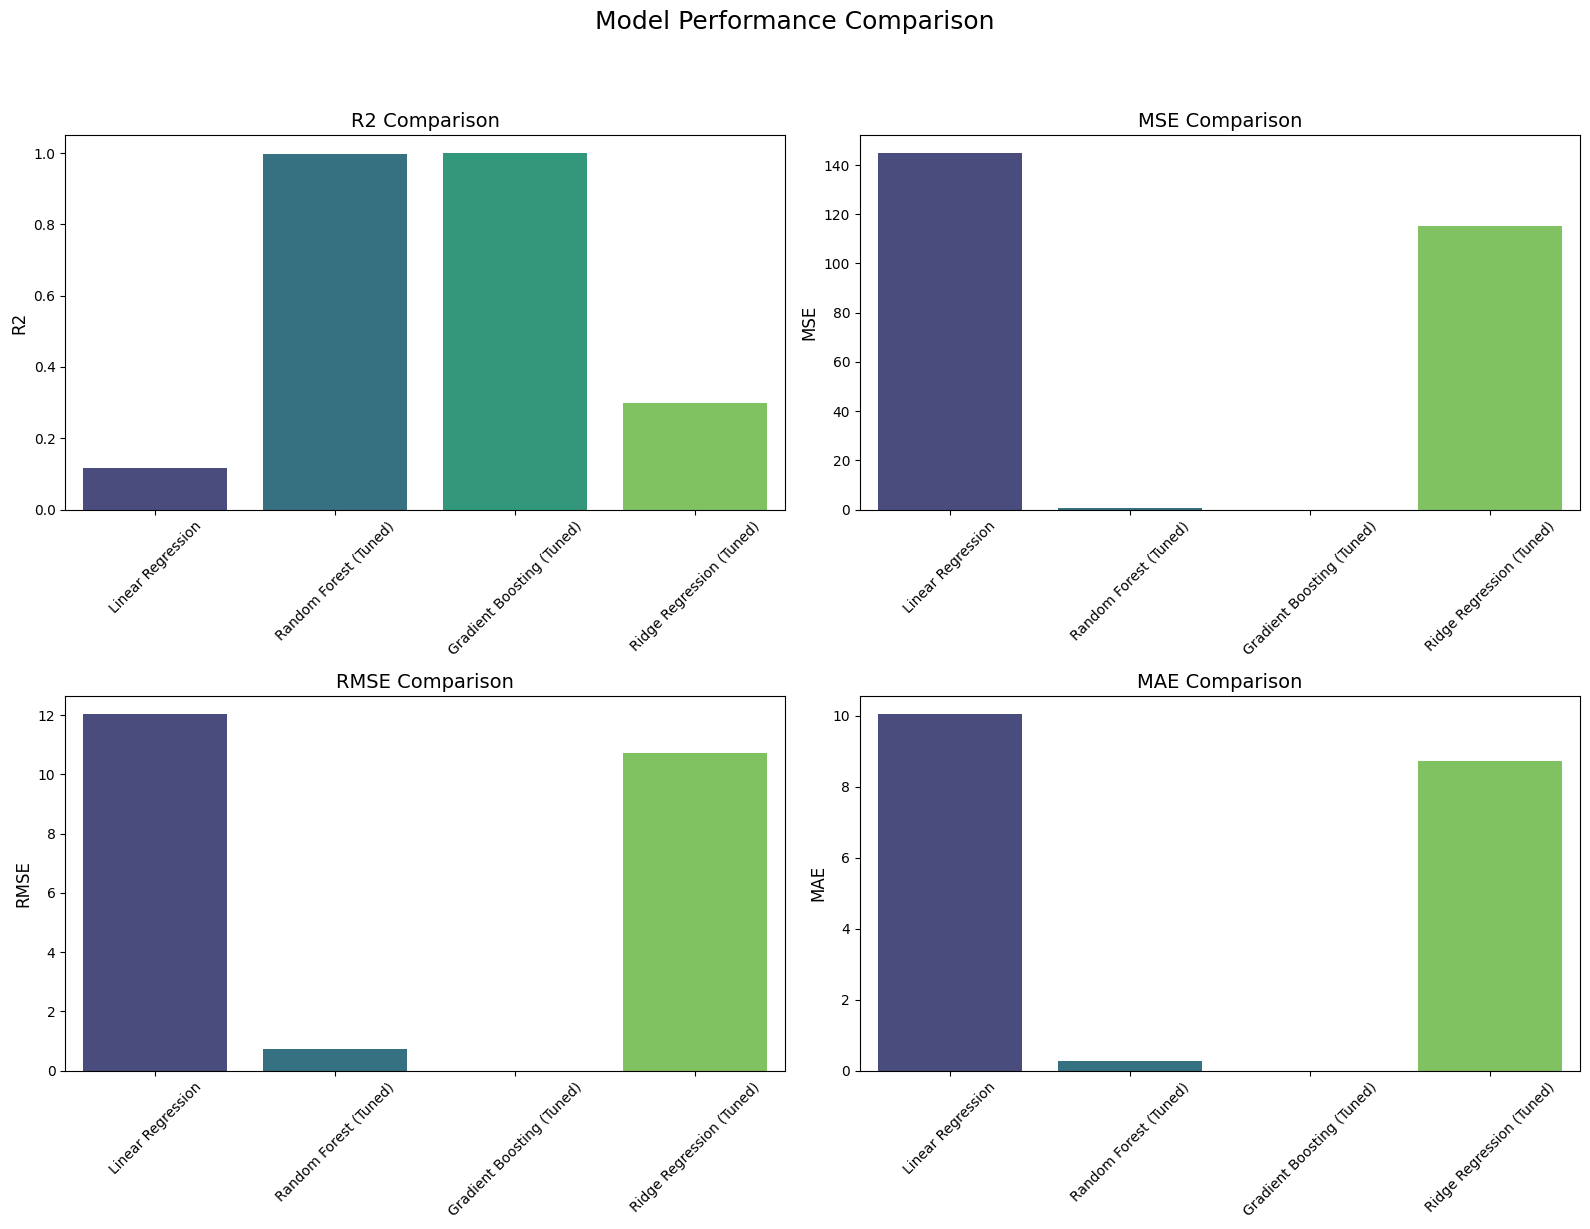

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, root_mean_squared_error

# --- 1. Data Loading and Preprocessing (from previous successful cells) ---
data = pd.read_csv("/content/agriculture_dataset.csv")
data = data.drop(columns=['Farm_ID'])

crop_encoder = LabelEncoder()
irrigation_encoder = LabelEncoder()
soil_encoder = LabelEncoder()
season_encoder = LabelEncoder()

data['Crop_Type'] = crop_encoder.fit_transform(data['Crop_Type'])
data['Irrigation_Type'] = irrigation_encoder.fit_transform(data['Irrigation_Type'])
data['Soil_Type'] = soil_encoder.fit_transform(data['Soil_Type'])
data['Season'] = season_encoder.fit_transform(data['Season'])

X = data.drop(columns=['Yield(tons)'])
y = data['Yield(tons)']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# --- 2. Define evaluate_model function (from previous successful cells) ---
def evaluate_model(model, X_train_data, X_test_data, y_train_data, y_test_data):
    model.fit(X_train_data, y_train_data)
    y_pred = model.predict(X_test_data)
    r2 = r2_score(y_test_data, y_pred)
    mse = mean_squared_error(y_test_data, y_pred)
    rmse = root_mean_squared_error(y_test_data, y_pred)
    mae = mean_absolute_error(y_test_data, y_pred)
    return r2, mse, rmse, mae

# --- 3. Model Instantiation and Initial Evaluation (Linear Regression) ---
ln_clf = LinearRegression()
ln_results = evaluate_model(ln_clf, X_train, X_test, y_train, y_test)

# --- 4. Hyperparameter Tuning and Final Evaluation (Random Forest) ---
rf_clf = RandomForestRegressor(random_state=42)
rf_param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10]
}
rf_grid_search = GridSearchCV(estimator=rf_clf, param_grid=rf_param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
rf_grid_search.fit(X_train, y_train)
rf_best_model = rf_grid_search.best_estimator_

rf_pred = rf_best_model.predict(X_test)
rf_r2 = r2_score(y_test, rf_pred)
rf_mse = mean_squared_error(y_test, rf_pred)
rf_rmse = root_mean_squared_error(y_test, rf_pred)
rf_mae = mean_absolute_error(y_test, rf_pred)

# --- 5. Hyperparameter Tuning and Final Evaluation (Gradient Boosting) ---
gb_clf = GradientBoostingRegressor(random_state=42)
gb_param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 5, 7]
}
gb_grid_search = GridSearchCV(estimator=gb_clf, param_grid=gb_param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
gb_grid_search.fit(X_train, y_train)
gb_best_model = gb_grid_search.best_estimator_

gb_pred = gb_best_model.predict(X_test)
gb_r2 = r2_score(y_test, gb_pred)
gb_mse = mean_squared_error(y_test, gb_pred)
gb_rmse = root_mean_squared_error(y_test, gb_pred)
gb_mae = mean_absolute_error(y_test, gb_pred)

# --- 6. One-Hot Encoding and Hyperparameter Tuning for Ridge ---
X_train_ohe = pd.get_dummies(X_train, columns=['Crop_Type', 'Irrigation_Type', 'Soil_Type', 'Season'], drop_first=True, dtype=int)
X_test_ohe = pd.get_dummies(X_test, columns=['Crop_Type', 'Irrigation_Type', 'Soil_Type', 'Season'], drop_first=True, dtype=int)
X_train_ohe, X_test_ohe = X_train_ohe.align(X_test_ohe, join='left', axis=1, fill_value=0)

ridge_clf = Ridge(random_state=42)
ridge_param_grid = {
    'alpha': [0.1, 1.0, 10.0, 100.0]
}
ridge_grid_search = GridSearchCV(estimator=ridge_clf, param_grid=ridge_param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
ridge_grid_search.fit(X_train_ohe, y_train)
ridge_best_model = ridge_grid_search.best_estimator_

ridge_pred = ridge_best_model.predict(X_test_ohe)
ridge_r2 = r2_score(y_test, ridge_pred)
ridge_mse = mean_squared_error(y_test, ridge_pred)
ridge_rmse = root_mean_squared_error(y_test, ridge_pred)
ridge_mae = mean_absolute_error(y_test, ridge_pred)

# --- 7. Create performance_df ---
results_data = {
    'Model': ['Linear Regression', 'Random Forest (Tuned)', 'Gradient Boosting (Tuned)', 'Ridge Regression (Tuned)'],
    'R2': [ln_results[0], rf_r2, gb_r2, ridge_r2],
    'MSE': [ln_results[1], rf_mse, gb_mse, ridge_mse],
    'RMSE': [ln_results[2], rf_rmse, gb_rmse, ridge_rmse],
    'MAE': [ln_results[3], rf_mae, gb_mae, ridge_mae]
}
performance_df = pd.DataFrame(results_data)

# --- 8. Plotting code ---
# 1. Melt the performance_df DataFrame
performance_melted = performance_df.melt(id_vars=['Model'],
                                       value_vars=['R2', 'MSE', 'RMSE', 'MAE'],
                                       var_name='Metric',
                                       value_name='Value')

# 2. Create a figure with a 2x2 grid of subplots
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('Model Performance Comparison', fontsize=18, y=1.02) # Add main title

# Define the metrics and their corresponding axes
metrics = ['R2', 'MSE', 'RMSE', 'MAE']
axis_flat = axes.flatten()

# 3. For each of the four metrics, create a bar plot
for i, metric in enumerate(metrics):
    ax = axis_flat[i]

    # Filter the melted DataFrame for the current metric
    metric_data = performance_melted[performance_melted['Metric'] == metric]

    # Create a bar plot
    sns.barplot(x='Model', y='Value', data=metric_data, ax=ax, palette='viridis')

    # Set title and y-axis label
    ax.set_title(f'{metric} Comparison', fontsize=14)
    ax.set_ylabel(metric, fontsize=12)
    ax.set_xlabel('') # Remove x-label from subplots to avoid clutter
    ax.tick_params(axis='x', rotation=45)

# 5. Adjust the layout of the subplots
plt.tight_layout(rect=[0, 0, 1, 0.98]) # Adjust rect to make space for suptitle

# 6. Display the plot
plt.show()

In [ ]:
from sklearn.linear_model import Lasso

# Initialize Lasso Regression model
lasso_clf = Lasso(random_state=42)

# Train and evaluate the Lasso model using the one-hot encoded data
lasso_results = evaluate_model(lasso_clf, X_train_ohe, X_test_ohe, y_train, y_test)

# Print the results
print("Lasso Regression - R2: {:.2f}, MSE: {:.2f}, RMSE: {:.2f}, MAE: {:.2f}".format(*lasso_results))

Lasso Regression - R2: 0.06, MSE: 154.08, RMSE: 12.41, MAE: 10.36


In [ ]:
lasso_param_grid = {
    'alpha': [0.001, 0.01, 0.1, 1.0, 10.0, 100.0]  # Regularization strength
}

lasso_grid_search = GridSearchCV(estimator=lasso_clf, param_grid=lasso_param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
lasso_grid_search.fit(X_train_ohe, y_train)

print("Best Lasso Regression Hyperparameters:", lasso_grid_search.best_params_)

Best Lasso Regression Hyperparameters: {'alpha': 0.1}


In [ ]:
lasso_best_model = lasso_grid_search.best_estimator_

lasso_cv_scores = cross_val_score(lasso_best_model, X_train_ohe, y_train, cv=5, scoring='neg_mean_squared_error')
print(f"Lasso Regression Cross-Validation MSE: {-lasso_cv_scores.mean():.2f} \u00b1 {lasso_cv_scores.std():.2f}")

lasso_best_model.fit(X_train_ohe, y_train)
lasso_pred = lasso_best_model.predict(X_test_ohe)

lasso_r2 = r2_score(y_test, lasso_pred)
lasso_mse = mean_squared_error(y_test, lasso_pred)
lasso_rmse = root_mean_squared_error(y_test, lasso_pred)
lasso_mae = mean_absolute_error(y_test, lasso_pred)

print("\nLasso Regression Model Final Evaluation:")
print(f"R\u00b2 Score: {lasso_r2:.2f}")
print(f"MSE: {lasso_mse:.2f}")
print(f"RMSE: {lasso_rmse:.2f}")
print(f"MAE: {lasso_mae:.2f}")

Lasso Regression Cross-Validation MSE: 127.75 ± 7.82

Lasso Regression Model Final Evaluation:
R² Score: 0.28
MSE: 118.69
RMSE: 10.89
MAE: 8.73


In [ ]:
from sklearn.model_selection import cross_val_score

lasso_best_model = lasso_grid_search.best_estimator_

lasso_cv_scores = cross_val_score(lasso_best_model, X_train_ohe, y_train, cv=5, scoring='neg_mean_squared_error')
print(f"Lasso Regression Cross-Validation MSE: {-lasso_cv_scores.mean():.2f} \u00b1 {lasso_cv_scores.std():.2f}")

lasso_best_model.fit(X_train_ohe, y_train)
lasso_pred = lasso_best_model.predict(X_test_ohe)

lasso_r2 = r2_score(y_test, lasso_pred)
lasso_mse = mean_squared_error(y_test, lasso_pred)
lasso_rmse = root_mean_squared_error(y_test, lasso_pred)
lasso_mae = mean_absolute_error(y_test, lasso_pred)

print("\nLasso Regression Model Final Evaluation:")
print(f"R\u00b2 Score: {lasso_r2:.2f}")
print(f"MSE: {lasso_mse:.2f}")
print(f"RMSE: {lasso_rmse:.2f}")
print(f"MAE: {lasso_mae:.2f}")

Lasso Regression Cross-Validation MSE: 127.75 ± 7.82

Lasso Regression Model Final Evaluation:
R² Score: 0.28
MSE: 118.69
RMSE: 10.89
MAE: 8.73


In [ ]:
results_data = {
    'Model': ['Linear Regression', 'Random Forest (Tuned)', 'Gradient Boosting (Tuned)', 'Ridge Regression (Tuned)', 'Lasso Regression (Tuned)'],
    'R2': [ln_results[0], rf_r2, gb_r2, ridge_r2, lasso_r2],
    'MSE': [ln_results[1], rf_mse, gb_mse, ridge_mse, lasso_mse],
    'RMSE': [ln_results[2], rf_rmse, gb_rmse, ridge_rmse, lasso_rmse],
    'MAE': [ln_results[3], rf_mae, gb_mae, ridge_mae, lasso_mae]
}

performance_df = pd.DataFrame(results_data)

print("Model Performance Comparison:\n")
print(performance_df.to_markdown(index=False, floatfmt=".2f"))

Model Performance Comparison:

| Model                     |   R2 |    MSE |   RMSE |   MAE |
|:--------------------------|-----:|-------:|-------:|------:|
| Linear Regression         | 0.12 | 144.83 |  12.03 | 10.05 |
| Random Forest (Tuned)     | 1.00 |   0.53 |   0.73 |  0.28 |
| Gradient Boosting (Tuned) | 1.00 |   0.00 |   0.00 |  0.00 |
| Ridge Regression (Tuned)  | 0.30 | 115.18 |  10.73 |  8.74 |
| Lasso Regression (Tuned)  | 0.28 | 118.69 |  10.89 |  8.73 |


/tmp/ipython-input-3362334513.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Model', y='Value', data=metric_data, ax=ax, palette='viridis')
/tmp/ipython-input-3362334513.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Model', y='Value', data=metric_data, ax=ax, palette='viridis')
/tmp/ipython-input-3362334513.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Model', y='Value', data=metric_data, ax=ax, palette='viridis')
/tmp/ipython-input-3362334513.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is d

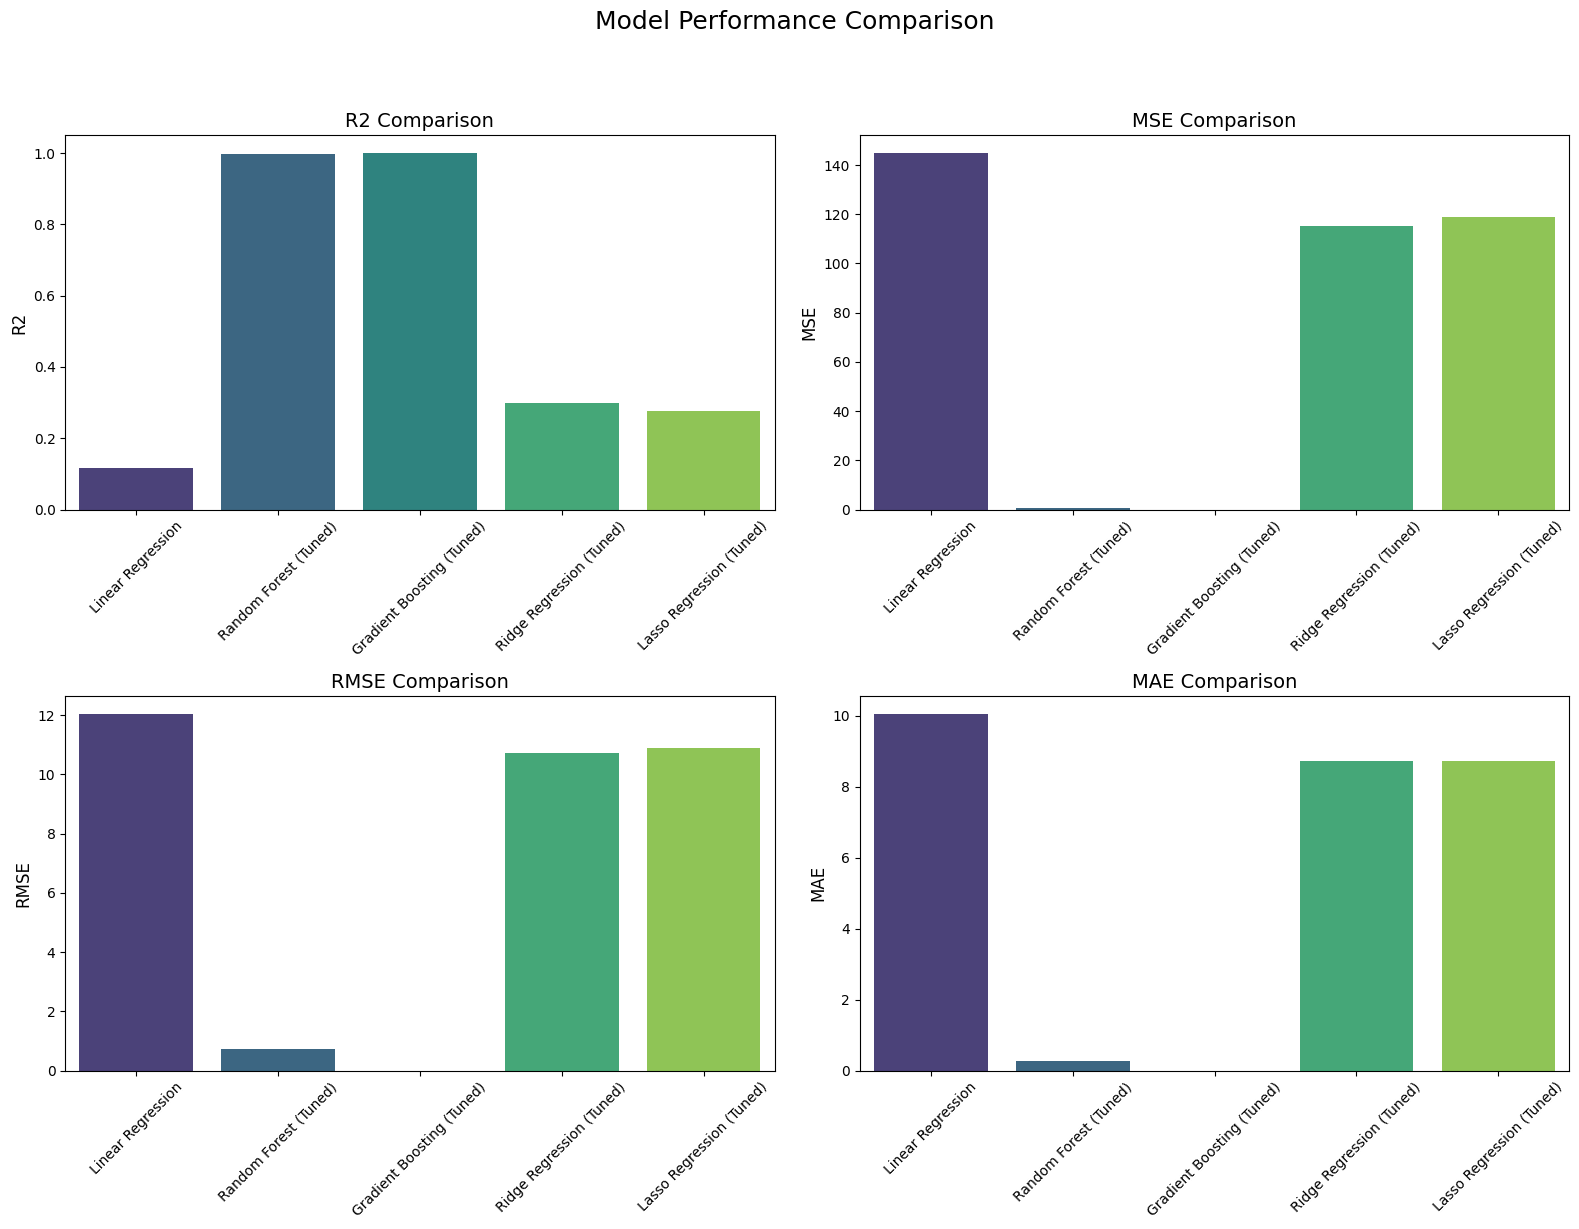

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Melt the performance_df DataFrame
performance_melted = performance_df.melt(id_vars=['Model'],
                                       value_vars=['R2', 'MSE', 'RMSE', 'MAE'],
                                       var_name='Metric',
                                       value_name='Value')

# 2. Create a figure with a 2x2 grid of subplots
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('Model Performance Comparison', fontsize=18, y=1.02) # Add main title

# Define the metrics and their corresponding axes
metrics = ['R2', 'MSE', 'RMSE', 'MAE']
axis_flat = axes.flatten()

# 3. For each of the four metrics, create a bar plot
for i, metric in enumerate(metrics):
    ax = axis_flat[i]

    # Filter the melted DataFrame for the current metric
    metric_data = performance_melted[performance_melted['Metric'] == metric]

    # Create a bar plot
    sns.barplot(x='Model', y='Value', data=metric_data, ax=ax, palette='viridis')

    # Set title and y-axis label
    ax.set_title(f'{metric} Comparison', fontsize=14)
    ax.set_ylabel(metric, fontsize=12)
    ax.set_xlabel('') # Remove x-label from subplots to avoid clutter
    ax.tick_params(axis='x', rotation=45)

# 5. Adjust the layout of the subplots
plt.tight_layout(rect=[0, 0, 1, 0.98]) # Adjust rect to make space for suptitle

# 6. Display the plot
plt.show()

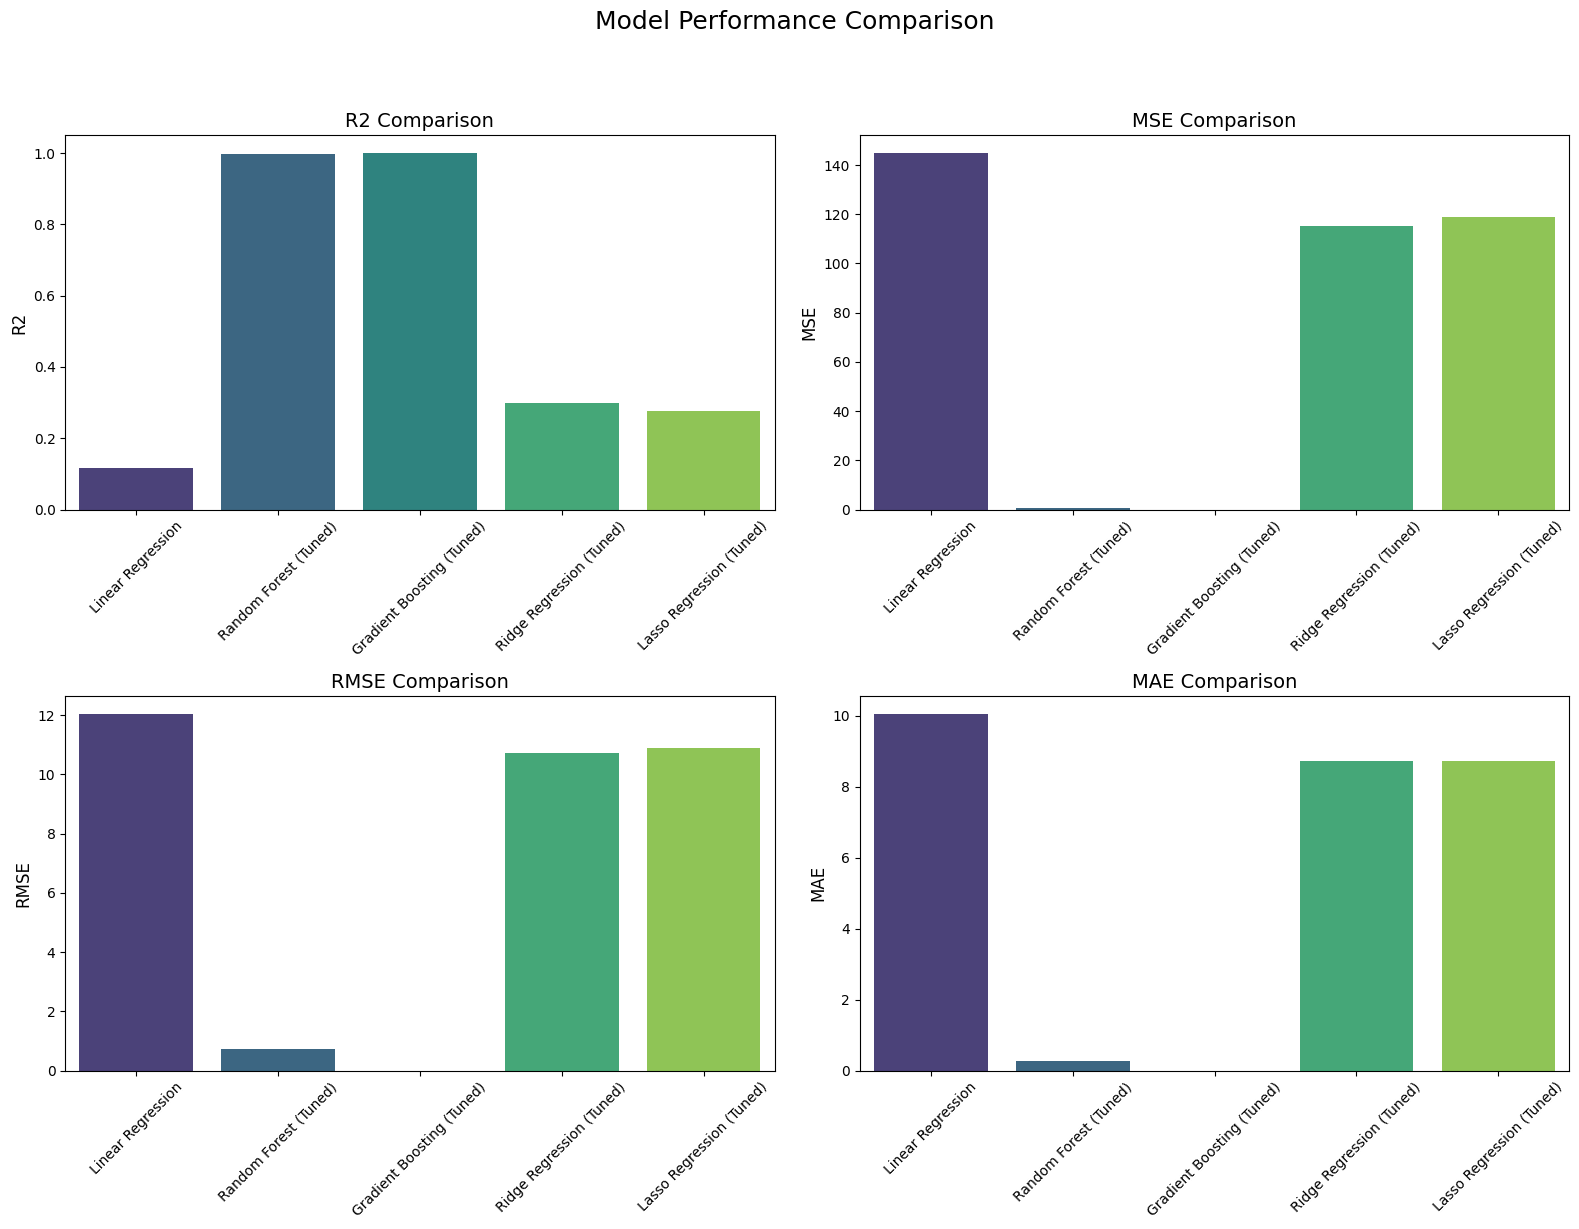

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Melt the performance_df DataFrame
performance_melted = performance_df.melt(id_vars=['Model'],
                                       value_vars=['R2', 'MSE', 'RMSE', 'MAE'],
                                       var_name='Metric',
                                       value_name='Value')

# 2. Create a figure with a 2x2 grid of subplots
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('Model Performance Comparison', fontsize=18, y=1.02) # Add main title

# Define the metrics and their corresponding axes
metrics = ['R2', 'MSE', 'RMSE', 'MAE']
axis_flat = axes.flatten()

# 3. For each of the four metrics, create a bar plot
for i, metric in enumerate(metrics):
    ax = axis_flat[i]

    # Filter the melted DataFrame for the current metric
    metric_data = performance_melted[performance_melted['Metric'] == metric]

    # Create a bar plot, addressing the FutureWarning
    sns.barplot(x='Model', y='Value', data=metric_data, ax=ax, palette='viridis', hue='Model', legend=False)

    # Set title and y-axis label
    ax.set_title(f'{metric} Comparison', fontsize=14)
    ax.set_ylabel(metric, fontsize=12)
    ax.set_xlabel('') # Remove x-label from subplots to avoid clutter
    ax.tick_params(axis='x', rotation=45)

# 5. Adjust the layout of the subplots
plt.tight_layout(rect=[0, 0, 1, 0.98]) # Adjust rect to make space for suptitle

# 6. Display the plot
plt.show()

In [ ]:
from sklearn.ensemble import StackingRegressor

# Define base estimators using the best-tuned models
estimators = [
    ('rf', rf_best_model),
    ('gb', gb_best_model),
    ('ridge', ridge_best_model)
]

# Initialize Linear Regression as the final estimator
final_estimator = LinearRegression()

# Instantiate StackingRegressor
stacking_clf = StackingRegressor(estimators=estimators, final_estimator=final_estimator, cv=5, n_jobs=-1)

print("Stacking Regressor initialized successfully.")

Stacking Regressor initialized successfully.


In [ ]:
stacking_clf.fit(X_train_ohe, y_train)
stacking_pred = stacking_clf.predict(X_test_ohe)

stacking_r2 = r2_score(y_test, stacking_pred)
stacking_mse = mean_squared_error(y_test, stacking_pred)
stacking_rmse = root_mean_squared_error(y_test, stacking_pred)
stacking_mae = mean_absolute_error(y_test, stacking_pred)

print("\nStacking Regressor Model Final Evaluation:")
print(f"R² Score: {stacking_r2:.2f}")
print(f"MSE: {stacking_mse:.2f}")
print(f"RMSE: {stacking_rmse:.2f}")
print(f"MAE: {stacking_mae:.2f}")


Stacking Regressor Model Final Evaluation:
R² Score: 1.00
MSE: 0.00
RMSE: 0.00
MAE: 0.00


In [ ]:
results_data = {
    'Model': ['Linear Regression', 'Random Forest (Tuned)', 'Gradient Boosting (Tuned)', 'Ridge Regression (Tuned)', 'Lasso Regression (Tuned)', 'Stacking Regressor'],
    'R2': [ln_results[0], rf_r2, gb_r2, ridge_r2, lasso_r2, stacking_r2],
    'MSE': [ln_results[1], rf_mse, gb_mse, ridge_mse, lasso_mse, stacking_mse],
    'RMSE': [ln_results[2], rf_rmse, gb_rmse, ridge_rmse, lasso_rmse, stacking_rmse],
    'MAE': [ln_results[3], rf_mae, gb_mae, ridge_mae, lasso_mae, stacking_mae]
}

performance_df = pd.DataFrame(results_data)

print("Model Performance Comparison with Stacking Regressor:\n")
print(performance_df.to_markdown(index=False, floatfmt=".2f"))

Model Performance Comparison with Stacking Regressor:

| Model                     |   R2 |    MSE |   RMSE |   MAE |
|:--------------------------|-----:|-------:|-------:|------:|
| Linear Regression         | 0.12 | 144.83 |  12.03 | 10.05 |
| Random Forest (Tuned)     | 1.00 |   0.53 |   0.73 |  0.28 |
| Gradient Boosting (Tuned) | 1.00 |   0.00 |   0.00 |  0.00 |
| Ridge Regression (Tuned)  | 0.30 | 115.18 |  10.73 |  8.74 |
| Lasso Regression (Tuned)  | 0.28 | 118.69 |  10.89 |  8.73 |
| Stacking Regressor        | 1.00 |   0.00 |   0.00 |  0.00 |


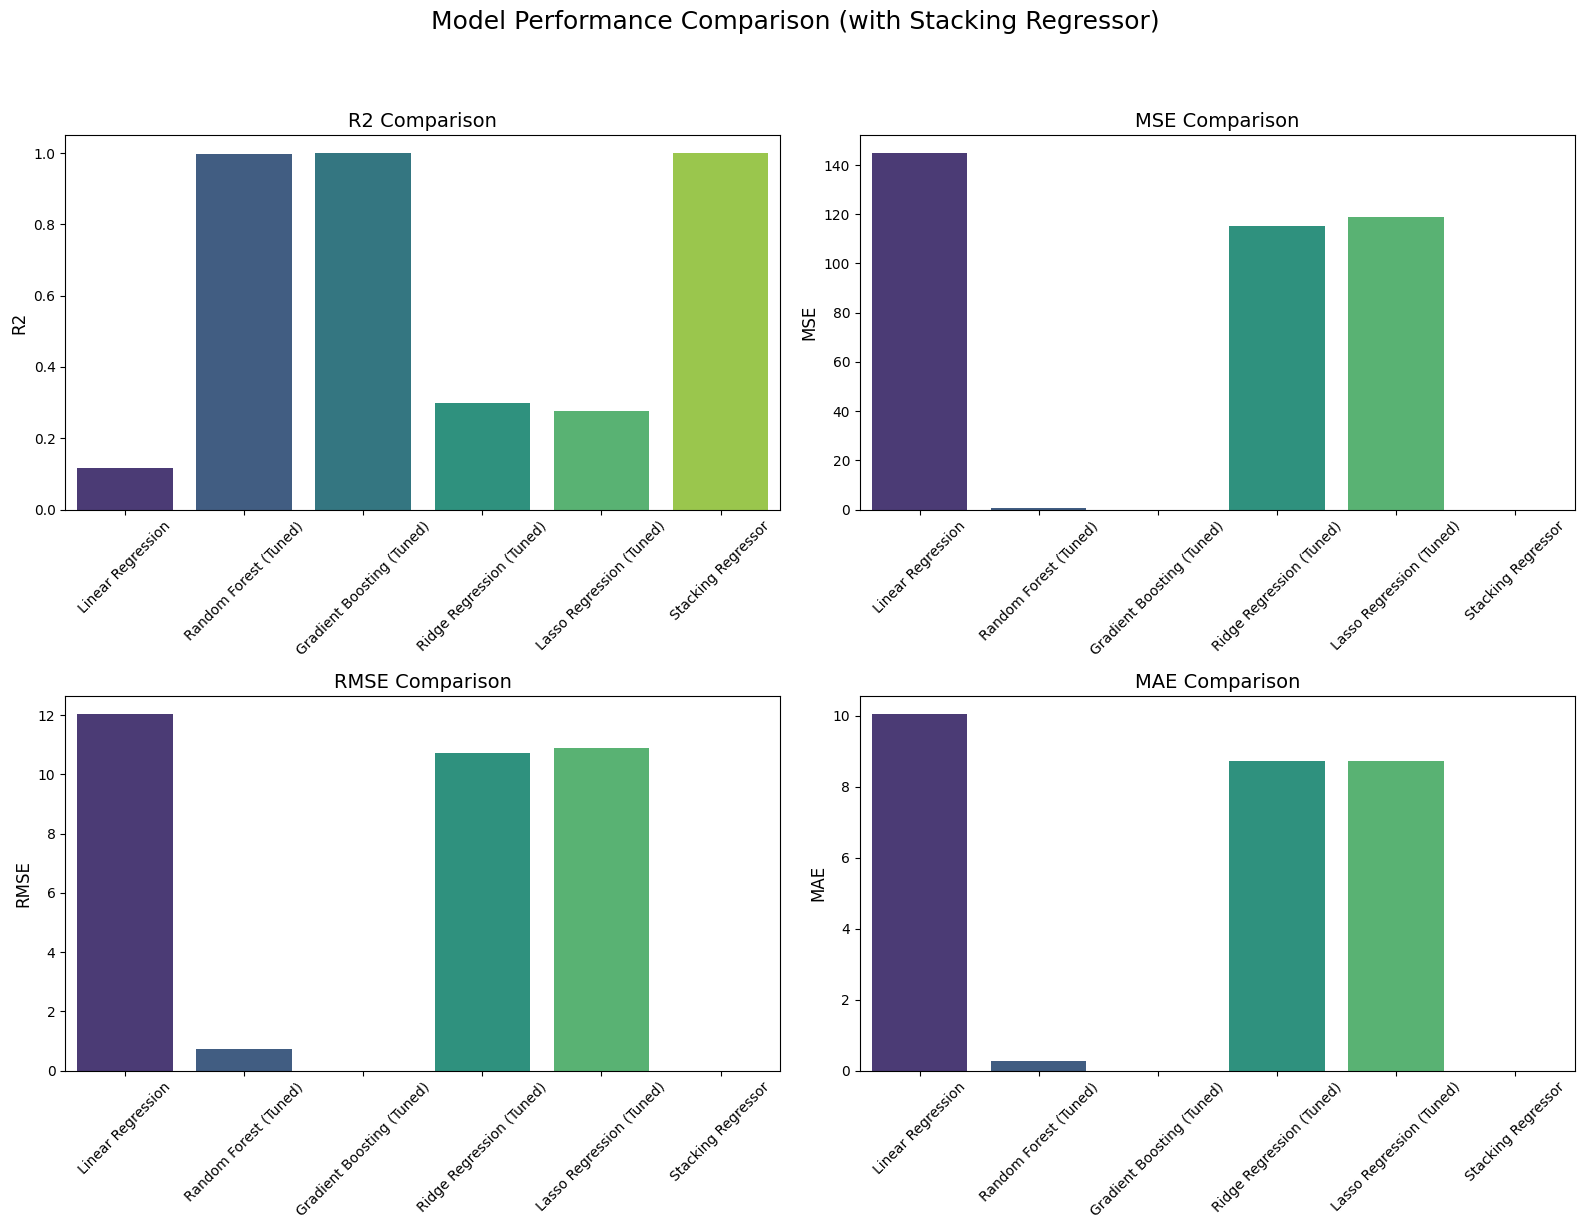

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Melt the performance_df DataFrame
performance_melted = performance_df.melt(id_vars=['Model'],
                                       value_vars=['R2', 'MSE', 'RMSE', 'MAE'],
                                       var_name='Metric',
                                       value_name='Value')

# 2. Create a figure with a 2x2 grid of subplots
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('Model Performance Comparison (with Stacking Regressor)', fontsize=18, y=1.02) # Add main title

# Define the metrics and their corresponding axes
metrics = ['R2', 'MSE', 'RMSE', 'MAE']
axis_flat = axes.flatten()

# 3. For each of the four metrics, create a bar plot
for i, metric in enumerate(metrics):
    ax = axis_flat[i]

    # Filter the melted DataFrame for the current metric
    metric_data = performance_melted[performance_melted['Metric'] == metric]

    # Create a bar plot, addressing the FutureWarning
    sns.barplot(x='Model', y='Value', data=metric_data, ax=ax, palette='viridis', hue='Model', legend=False)

    # Set title and y-axis label
    ax.set_title(f'{metric} Comparison', fontsize=14)
    ax.set_ylabel(metric, fontsize=12)
    ax.set_xlabel('') # Remove x-label from subplots to avoid clutter
    ax.tick_params(axis='x', rotation=45)

# 5. Adjust the layout of the subplots
plt.tight_layout(rect=[0, 0, 1, 0.98]) # Adjust rect to make space for suptitle

# 6. Display the plot
plt.show()

In [ ]:
import pandas as pd
import joblib
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, root_mean_squared_error

# --- 1. Data Loading and Preprocessing (from previous successful cells) ---
data = pd.read_csv("/content/agriculture_dataset.csv")
data = data.drop(columns=['Farm_ID'])

crop_encoder = LabelEncoder()
irrigation_encoder = LabelEncoder()
soil_encoder = LabelEncoder()
season_encoder = LabelEncoder()

data['Crop_Type'] = crop_encoder.fit_transform(data['Crop_Type'])
data['Irrigation_Type'] = irrigation_encoder.fit_transform(data['Irrigation_Type'])
data['Soil_Type'] = soil_encoder.fit_transform(data['Soil_Type'])
data['Season'] = season_encoder.fit_transform(data['Season'])

X = data.drop(columns=['Yield(tons)'])
y = data['Yield(tons)']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# --- 2. Define evaluate_model function (from previous successful cells) ---
def evaluate_model(model, X_train_data, X_test_data, y_train_data, y_test_data):
    model.fit(X_train_data, y_train_data)
    y_pred = model.predict(X_test_data)
    r2 = r2_score(y_test_data, y_pred)
    mse = mean_squared_error(y_test_data, y_pred)
    rmse = root_mean_squared_error(y_test_data, y_pred)
    mae = mean_absolute_error(y_test_data, y_pred)
    return r2, mse, rmse, mae

# --- 3. Model Instantiation and Initial Evaluation (Linear Regression) ---
ln_clf = LinearRegression()
ln_results = evaluate_model(ln_clf, X_train, X_test, y_train, y_test)

# --- 4. Hyperparameter Tuning and Final Evaluation (Random Forest) ---
rf_clf = RandomForestRegressor(random_state=42)
rf_param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10]
}
rf_grid_search = GridSearchCV(estimator=rf_clf, param_grid=rf_param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
rf_grid_search.fit(X_train, y_train)
rf_best_model = rf_grid_search.best_estimator_

rf_pred = rf_best_model.predict(X_test)
rf_r2 = r2_score(y_test, rf_pred)
rf_mse = mean_squared_error(y_test, rf_pred)
rf_rmse = root_mean_squared_error(y_test, rf_pred)
rf_mae = mean_absolute_error(y_test, rf_pred)

# --- 5. Hyperparameter Tuning and Final Evaluation (Gradient Boosting) ---
gb_clf = GradientBoostingRegressor(random_state=42)
gb_param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 5, 7]
}
gb_grid_search = GridSearchCV(estimator=gb_clf, param_grid=gb_param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
gb_grid_search.fit(X_train, y_train)
gb_best_model = gb_grid_search.best_estimator_

gb_pred = gb_best_model.predict(X_test)
gb_r2 = r2_score(y_test, gb_pred)
gb_mse = mean_squared_error(y_test, gb_pred)
gb_rmse = root_mean_squared_error(y_test, gb_pred)
gb_mae = mean_absolute_error(y_test, gb_pred)

# --- 6. One-Hot Encoding and Hyperparameter Tuning for Ridge ---
X_train_ohe = pd.get_dummies(X_train, columns=['Crop_Type', 'Irrigation_Type', 'Soil_Type', 'Season'], drop_first=True, dtype=int)
X_test_ohe = pd.get_dummies(X_test, columns=['Crop_Type', 'Irrigation_Type', 'Soil_Type', 'Season'], drop_first=True, dtype=int)
X_train_ohe, X_test_ohe = X_train_ohe.align(X_test_ohe, join='left', axis=1, fill_value=0)

ridge_clf = Ridge(random_state=42)
ridge_param_grid = {
    'alpha': [0.1, 1.0, 10.0, 100.0]
}
ridge_grid_search = GridSearchCV(estimator=ridge_clf, param_grid=ridge_param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
ridge_grid_search.fit(X_train_ohe, y_train)
ridge_best_model = ridge_grid_search.best_estimator_

ridge_pred = ridge_best_model.predict(X_test_ohe)
ridge_r2 = r2_score(y_test, ridge_pred)
ridge_mse = mean_squared_error(y_test, ridge_pred)
ridge_rmse = root_mean_squared_error(y_test, ridge_pred)
ridge_mae = mean_absolute_error(y_test, ridge_pred)

# --- 7. Hyperparameter Tuning for Lasso ---
lasso_clf = Lasso(random_state=42)
lasso_param_grid = {
    'alpha': [0.001, 0.01, 0.1, 1.0, 10.0, 100.0]
}
lasso_grid_search = GridSearchCV(estimator=lasso_clf, param_grid=lasso_param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
lasso_grid_search.fit(X_train_ohe, y_train)
lasso_best_model = lasso_grid_search.best_estimator_

lasso_pred = lasso_best_model.predict(X_test_ohe)
lasso_r2 = r2_score(y_test, lasso_pred)
lasso_mse = mean_squared_error(y_test, lasso_pred)
lasso_rmse = root_mean_squared_error(y_test, lasso_pred)
lasso_mae = mean_absolute_error(y_test, lasso_pred)


# --- Save Best Model and Encoders ---

# Save the Gradient Boosting model
joblib.dump(gb_best_model, 'gradient_boosting_model.joblib')
print("Gradient Boosting Model saved as 'gradient_boosting_model.joblib'")

# Save the LabelEncoder objects
joblib.dump(crop_encoder, 'crop_encoder.joblib')
print("Crop Type LabelEncoder saved as 'crop_encoder.joblib'")

joblib.dump(irrigation_encoder, 'irrigation_encoder.joblib')
print("Irrigation Type LabelEncoder saved as 'irrigation_encoder.joblib'")

joblib.dump(soil_encoder, 'soil_encoder.joblib')
print("Soil Type LabelEncoder saved as 'soil_encoder.joblib'")

joblib.dump(season_encoder, 'season_encoder.joblib')
print("Season LabelEncoder saved as 'season_encoder.joblib'")


Gradient Boosting Model saved as 'gradient_boosting_model.joblib'
Crop Type LabelEncoder saved as 'crop_encoder.joblib'
Irrigation Type LabelEncoder saved as 'irrigation_encoder.joblib'
Soil Type LabelEncoder saved as 'soil_encoder.joblib'
Season LabelEncoder saved as 'season_encoder.joblib'


In [ ]:
def predict_new_yield(model, encoders, feature_names, raw_input_string):
    """
    Predicts the yield for a new farm based on raw input features.

    Args:
        model: The trained Gradient Boosting model.
        encoders (dict): A dictionary containing fitted LabelEncoder objects for categorical features.
        feature_names (list): A list of feature names in the correct order.
        raw_input_string (str): A comma-separated string of raw input feature values.

    Returns:
        float: The predicted yield.
    """
    input_parts = raw_input_string.split(',')
    processed_features = []

    categorical_features = ['Crop_Type', 'Irrigation_Type', 'Soil_Type', 'Season']

    for i, feature_name in enumerate(feature_names):
        value = input_parts[i]
        if feature_name in categorical_features:
            # Use the appropriate LabelEncoder for the categorical feature
            encoder = encoders[feature_name]
            processed_features.append(encoder.transform([value])[0])
        else:
            # Convert numerical features to float
            processed_features.append(float(value))

    # Create a DataFrame from the processed features
    user_input_df = pd.DataFrame([processed_features], columns=feature_names)

    # Make a prediction using the trained model
    prediction = model.predict(user_input_df)

    return prediction[0]

print("The 'predict_new_yield' function has been defined.")

The 'predict_new_yield' function has been defined.


In [ ]:
import gradio as gr
import joblib
import pandas as pd

# --- 1. Load the saved model and encoders globally ---
# (Assuming these files are saved in the Colab environment after previous steps)

try:
    gb_best_model = joblib.load('gradient_boosting_model.joblib')
    crop_encoder = joblib.load('crop_encoder.joblib')
    irrigation_encoder = joblib.load('irrigation_encoder.joblib')
    soil_encoder = joblib.load('soil_encoder.joblib')
    season_encoder = joblib.load('season_encoder.joblib')
    print("Model and LabelEncoders loaded successfully.")
except FileNotFoundError:
    print("Error: Model or encoder files not found. Please ensure they are saved.")
    # Exit or handle the error appropriately, e.g., by re-running saving code
    exit()

# --- 2. Define necessary mapping and feature names ---

# Feature names in the order expected by the model
# (This should match X_train.columns from previous steps)
feature_names = ['Crop_Type', 'Farm_Area(acres)', 'Irrigation_Type',
                   'Fertilizer_Used(tons)', 'Pesticide_Used(kg)', 'Soil_Type', 'Season',
                   'Water_Usage(cubic meters)']

# Map for categorical encoders
categorical_features_map = {
    'Crop_Type': crop_encoder,
    'Irrigation_Type': irrigation_encoder,
    'Soil_Type': soil_encoder,
    'Season': season_encoder
}

# --- 3. Define the prediction function for Gradio ---

def predict_yield_for_gradio(raw_input_string):
    """
    Predicts the yield for a new farm based on raw input features for Gradio.

    Args:
        raw_input_string (str): A comma-separated string of raw input feature values.

    Returns:
        str: The predicted yield formatted as a string.
    """
    input_parts = raw_input_string.split(',')
    processed_features = []

    categorical_features_list = ['Crop_Type', 'Irrigation_Type', 'Soil_Type', 'Season']

    for i, feature_name in enumerate(feature_names):
        value = input_parts[i]
        if feature_name in categorical_features_list:
            # Use the appropriate LabelEncoder for the categorical feature
            encoder = categorical_features_map[feature_name]
            try:
                processed_features.append(encoder.transform([value])[0])
            except ValueError:
                return f"Error: Invalid categorical value '{value}' for {feature_name}."
        else:
            # Convert numerical features to float
            try:
                processed_features.append(float(value))
            except ValueError:
                return f"Error: Invalid numerical value '{value}' for {feature_name}."

    # Create a DataFrame from the processed features
    user_input_df = pd.DataFrame([processed_features], columns=feature_names)

    # Make a prediction using the trained model
    prediction = gb_best_model.predict(user_input_df)

    return f"{prediction[0]:.2f} tons"

example_input = "Cotton,329.4,Sprinkler,8.14,2.21,Loamy,Kharif,76648.2"

iface = gr.Interface(
    fn=predict_yield_for_gradio,
    inputs=gr.Textbox(lines=1, placeholder="Enter comma-separated features: Crop_Type,Farm_Area(acres),Irrigation_Type,Fertilizer_Used(tons),Pesticide_Used(kg),Soil_Type,Season,Water_Usage(cubic meters)", value=example_input),
    outputs=gr.Textbox(label="Predicted Yield"),
    title="Agriculture Yield Prediction",
    description="Enter farm characteristics (comma-separated) to predict yield. Example: Cotton,329.4,Sprinkler,8.14,2.21,Loamy,Kharif,76648.2"
)

iface.launch(share=True)

Model and LabelEncoders loaded successfully.
Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://f73b4438e857d74702.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
